In [1302]:
# Import libraries need for Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [1303]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('test.csv')
dt1=pd.read_csv('train.csv')

In [1304]:
pd.set_option("display.max_columns", 100)

In [1305]:
dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [1306]:
dt1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [1307]:
#NAN values
print('The NAN values in train is', dt1.isna().sum())
print('*'*100)
print('The NAN values in test is', dt.isna().sum())

The NAN values in train is Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
****************************************************************************************************
The NAN values in test is Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64


In [1308]:
# Dataframe columns
print('The columns in train is', dt1.columns)
print('*'*100)
print('The columns in test is', dt.columns)

The columns in train is Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       '

In [1309]:
# To find types of data present in the dataset
print('The unique columns in train is', dt1.nunique())
print('*'*100)
print('The unique columns in test is', dt.nunique())

The unique columns in train is Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64
****************************************************************************************************
The unique columns in test is Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
                ... 
MiscVal            8
MoSold            12
YrSold             5
SaleType           6
SaleCondition      4
Length: 80, dtype: int64


In [1310]:
# To find the data type of the dataset
for col in dt1:
    print ('This column', col ,'has', dt1[col].unique(),'unique elements')
    print ('*'*100)
print('-+-'*166)
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column Id has [127 889 793 ... 196  31 617] unique elements
****************************************************************************************************
This column MSSubClass has [120  20  60  50  70  30 160  85  45  90  40  80 190  75 180] unique elements
****************************************************************************************************
This column MSZoning has ['RL' 'RM' 'FV' 'RH' 'C (all)'] unique elements
****************************************************************************************************
This column LotFrontage has [ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.


<AxesSubplot:>

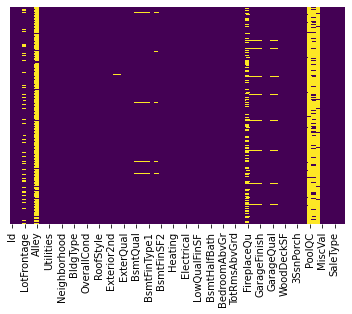

In [1311]:
sns.heatmap(dt1.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

<AxesSubplot:>

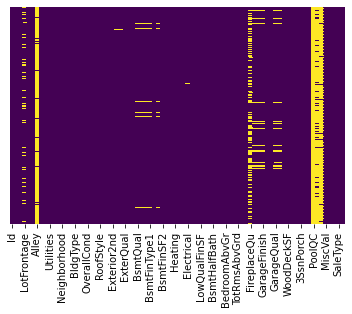

In [1312]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [1313]:
# Getting information on the dataset
print ('The training dataset consists of', dt1.info())
print('*'*100)
print ('The testing dataset consists of',dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [1314]:
# To find the NAN of the dataset
for col in dt1:
    print ('This column', col ,'has', dt1[col].isna().sum(),'NAN elements')
    print ('*'*100)
print('-+-'*166)
for col in dt:
    print ('This column', col ,'has', dt[col].isna().sum(),'NAN elements')
    print ('*'*100)

This column Id has 0 NAN elements
****************************************************************************************************
This column MSSubClass has 0 NAN elements
****************************************************************************************************
This column MSZoning has 0 NAN elements
****************************************************************************************************
This column LotFrontage has 214 NAN elements
****************************************************************************************************
This column LotArea has 0 NAN elements
****************************************************************************************************
This column Street has 0 NAN elements
****************************************************************************************************
This column Alley has 1091 NAN elements
****************************************************************************************************
This column Lot

In [1315]:
# To find the correlection in the dataset
dt1.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.006629,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.060652,0.003868,0.005269,-0.019494,-0.013812,0.009647,-0.029671,-0.070180,-0.024325,0.023027,-0.043572,-0.015187,-0.028512,0.009376,0.001216,-0.001613,-0.024175,-0.000469,0.007549,0.010048,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.365220,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027868,-0.052236,-0.062403,-0.134170,-0.214042,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,0.077630,-0.027639,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.006629,-0.365220,1.000000,0.557257,0.247809,-0.053345,0.118554,0.096050,0.202225,0.247780,0.002514,0.123943,0.386261,0.448186,0.099250,0.007885,0.410414,0.104255,0.001528,0.189321,0.053168,0.264010,-0.002890,0.351969,0.262076,0.061101,0.276798,0.344908,0.101751,0.167092,0.023118,0.059508,0.033111,0.223429,-0.004559,0.025046,-0.004296,0.341294
LotArea,-0.029212,-0.124151,0.557257,1.000000,0.107188,0.017513,0.005506,0.027228,0.121448,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,-0.034981,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.247809,0.107188,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,-0.040893,0.308676,0.528285,0.458758,0.316624,-0.039295,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.541719,0.596322,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.053345,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,0.044336,-0.146384,-0.162481,-0.134420,0.036668,0.041877,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.318278,-0.161996,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.118554,0.005506,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,-0.027682,0.155559,0.386265,0.279450,0.011834,-0.189044,0.198644,0.164983,-0.028161,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.826366,0.525346,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.096050,0.027228,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,-0.044694,0.174732,0.280720,0.233384,0.155102,-0.072526,0.295048,0.104643,-0.011375,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.639153,0.428325,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.060652,0.027868,0.202225,0.121448,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,-0.065723,0.109850,0.366833,0.339938,0.173358,-0.070518,0.387891,0.086720,0.014198,0.268545,0.200926,0.091717,-0.038281,0.279391,0.243812,0.254547,0.342553,0.365849,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.466386
BsmtFinSF1,0.003868,-0.052236,0.247780,0.221851,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,-0.052145,-0.499861,0.518940,0.445876,-0.127656,-0.070932,0.217160,0.645126,0.063895,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.135558,0.197529,0.286290,0.192939,0.108802,-0.082351,0.025485,0.

In [1316]:
dt.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
Id,1.000000,0.035247,-0.017848,-0.045497,0.005823,-0.089945,-0.000174,-0.036955,-0.012331,-0.040462,-0.051283,0.041345,-0.019326,0.019726,0.144675,0.087688,0.139969,-0.077773,0.062190,0.083174,0.146049,0.152676,0.007486,0.132171,-0.000541,-0.001975,0.053864,0.052191,-0.033619,0.049117,-0.000275,-0.134738,-0.012348,NaN,NaN,-0.073024,0.015132,0.034579
MSSubClass,0.035247,1.000000,-0.487565,-0.186654,-0.116077,-0.068113,0.041932,-0.023317,0.002761,-0.142908,-0.079328,-0.169129,-0.336822,-0.350270,0.338926,0.012343,0.030615,-0.000676,-0.041577,0.095903,0.213601,-0.061750,0.275461,0.002973,-0.084663,0.114308,-0.086798,-0.122536,0.028190,-0.097449,-0.047570,-0.045672,-0.072139,NaN,NaN,0.137542,-0.004079,0.044441
LotFrontage,-0.017848,-0.487565,1.000000,0.383137,0.267153,-0.108327,0.152067,0.059014,0.151632,0.165505,0.268758,0.173770,0.420828,0.496136,-0.016069,0.202904,0.360840,0.092577,-0.055672,0.250443,0.040245,0.249869,-0.011250,0.356616,0.283172,0.121317,0.319441,0.334838,0.007567,0.084421,-0.061468,0.111592,0.077651,NaN,NaN,0.032309,-0.048399,0.064554
LotArea,-0.045497,-0.186654,0.383137,1.000000,0.109161,-0.071113,0.037757,-0.022957,0.062943,0.209632,0.277855,-0.029717,0.283111,0.286714,0.030128,0.030371,0.231721,0.212162,0.020883,0.141118,0.034980,0.134990,-0.030264,0.211624,0.250416,0.000674,0.154919,0.152737,0.059117,0.067269,-0.055667,0.007832,0.090367,NaN,NaN,-0.020398,-0.034709,0.041735
OverallQual,0.005823,-0.116077,0.267153,0.109161,1.000000,-0.131891,0.560092,0.528983,0.424314,0.328421,-0.139583,0.306051,0.578468,0.553431,0.205253,0.016101,0.565494,0.150559,-0.076885,0.558577,0.177858,0.108994,-0.205815,0.409677,0.425392,0.576102,0.618763,0.542729,0.288506,0.175569,-0.195240,-0.031605,0.086383,NaN,NaN,-0.099852,-0.008545,0.061736
OverallCond,-0.089945,-0.068113,-0.108327,-0.071113,-0.131891,1.000000,-0.366830,0.045747,-0.082467,-0.126968,0.021459,-0.095575,-0.213289,-0.197177,-0.006572,-0.071717,-0.151462,-0.121640,0.230622,-0.288175,-0.103079,-0.061694,-0.128606,-0.133094,-0.071834,-0.347568,-0.291486,-0.269860,-0.078167,-0.065010,0.137325,-0.038308,-0.003167,NaN,NaN,0.019495,-0.043722,-0.001908
YearBuilt,-0.000174,0.041932,0.152067,0.037757,0.560092,-0.366830,1.000000,0.593138,0.284734,0.343374,-0.140391,0.122930,0.416016,0.299125,0.005011,-0.160248,0.205685,0.280054,-0.077984,0.455999,0.243680,-0.026005,-0.201801,0.099718,0.205425,0.822532,0.591190,0.508563,0.311878,0.179072,-0.457897,0.011253,-0.019113,NaN,NaN,-0.085967,-0.060201,-0.014054
YearRemodAdd,-0.036955,-0.023317,0.059014,-0.022957,0.528983,0.045747,0.593138,1.000000,0.169188,0.191460,-0.170299,0.211142,0.336976,0.274479,0.075768,-0.006942,0.257875,0.182556,-0.017015,0.416337,0.135780,-0.058289,-0.187750,0.136495,0.088244,0.656544,0.391542,0.306892,0.243722,0.174213,-0.196420,-0.031424,-0.009695,NaN,NaN,-0.103391,0.009670,0.045230
MasVnrArea,-0.012331,0.002761,0.151632,0.062943,0.424314,-0.082467,0.284734,0.169188,1.000000,0.254935,-0.101817,0.136442,0.353100,0.369103,0.180463,-0.060730,0.407814,0.079406,0.075530,0.311178,0.205684,0.153659,-0.036277,0.290170,0.273130,0.242928,0.456609,0.408157,0.196125,0.099761,-0.148557,0.020375,0.120597,NaN,NaN,-0.059927,-0.082810,0.012790
BsmtFinSF1,-0.040462,-0.142908,0.165505,0.209632,0.328421,-0.126968,0.343374,0.191460,0.254935,1.000000,-0.040759,-0.474047,0.538182,0.446604,-0.179595,-0.029585,0.168317,0.667976,0.082806,0.076450,-0.047032,-0.076283,-0.143169,0.047362,0.271326,0.234465,0.337705,0.344441,0.254996,0.124929,-0.209330,0.030231,0.178546,NaN,NaN,-0.045842,-0.113279,0.052788


In [1317]:
# Analysing the data 
dt1.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


In [1318]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,292.0,755.955479,442.565228,6.0,377.75,778.0,1152.25,1456.0
MSSubClass,292.0,57.414384,43.780649,20.0,20.00,50.0,70.00,190.0
LotFrontage,247.0,66.425101,21.726343,21.0,53.50,65.0,79.00,150.0
LotArea,292.0,10645.143836,13330.669795,1526.0,7200.00,9200.0,11658.75,215245.0
OverallQual,292.0,6.078767,1.356147,3.0,5.00,6.0,7.00,10.0
OverallCond,292.0,5.493151,1.063267,3.0,5.00,5.0,6.00,9.0
YearBuilt,292.0,1972.616438,30.447016,1872.0,1954.00,1976.0,2001.00,2009.0
YearRemodAdd,292.0,1985.294521,20.105792,1950.0,1968.00,1994.0,2003.25,2010.0
MasVnrArea,291.0,109.171821,175.030021,0.0,0.00,0.0,180.00,1031.0
BsmtFinSF1,292.0,439.294521,429.559675,0.0,0.00,369.5,700.50,1767.0


<AxesSubplot:>

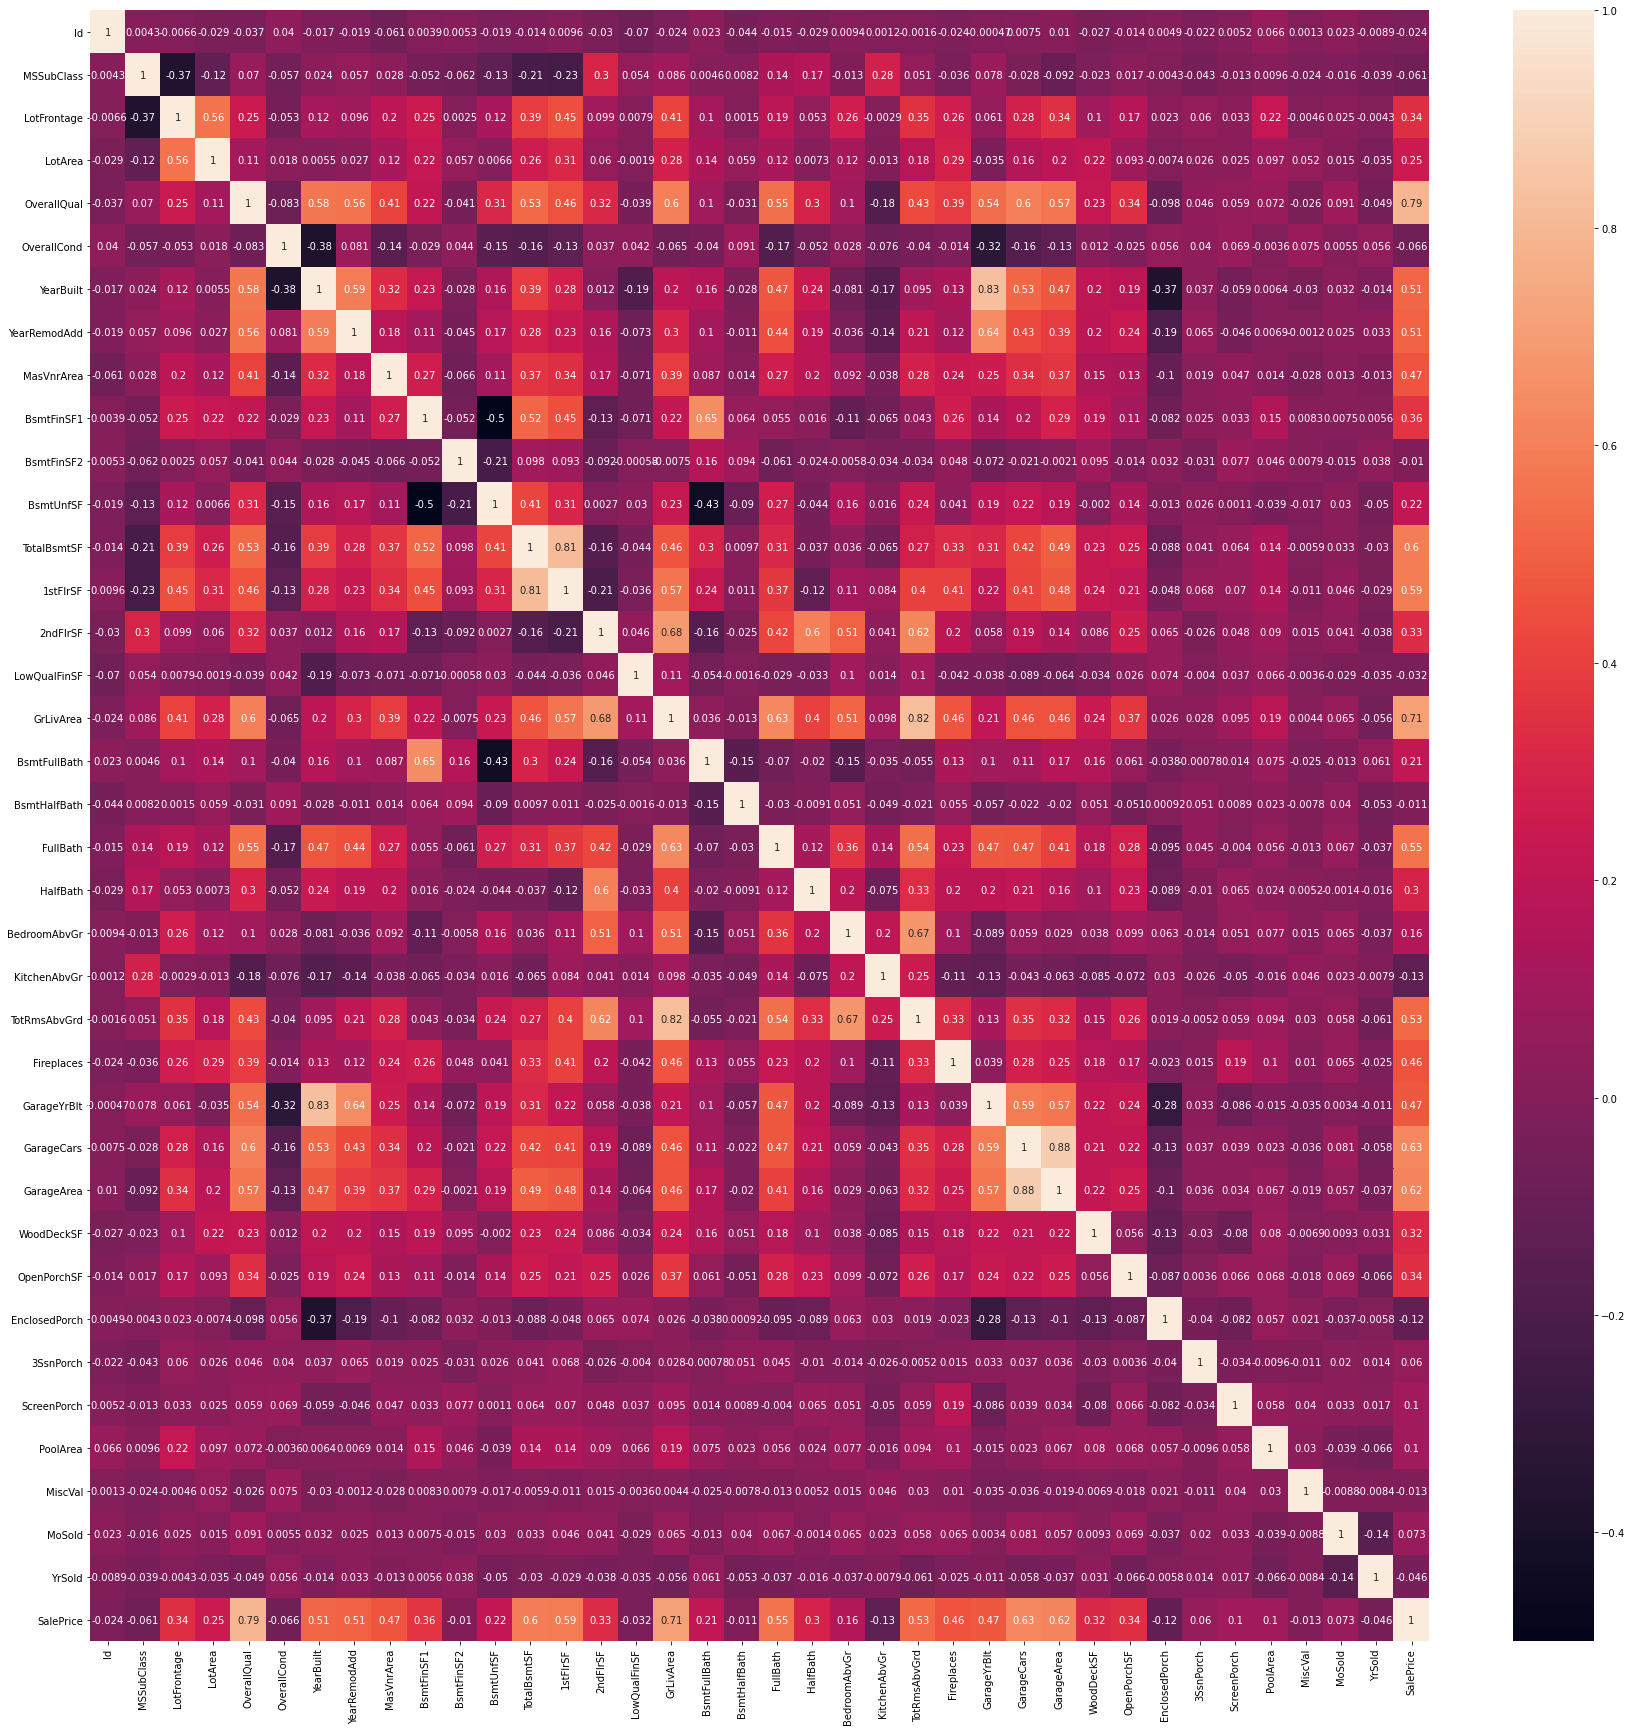

In [1319]:
e=dt1.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(30,30))
sns.heatmap(e,annot=True)

In [1320]:
e['SalePrice'].sort_values()

KitchenAbvGr    -0.132108
EnclosedPorch   -0.115004
OverallCond     -0.065642
MSSubClass      -0.060775
YrSold          -0.045508
LowQualFinSF    -0.032381
Id              -0.023897
MiscVal         -0.013071
BsmtHalfBath    -0.011109
BsmtFinSF2      -0.010151
3SsnPorch        0.060119
MoSold           0.072764
ScreenPorch      0.100284
PoolArea         0.103280
BedroomAbvGr     0.158281
BsmtFullBath     0.212924
BsmtUnfSF        0.215724
LotArea          0.249499
HalfBath         0.295592
WoodDeckSF       0.315444
2ndFlrSF         0.330386
OpenPorchSF      0.339500
LotFrontage      0.341294
BsmtFinSF1       0.362874
Fireplaces       0.459611
MasVnrArea       0.466386
GarageYrBlt      0.474346
YearRemodAdd     0.507831
YearBuilt        0.514408
TotRmsAbvGrd     0.528363
FullBath         0.554988
1stFlrSF         0.587642
TotalBsmtSF      0.595042
GarageArea       0.619000
GarageCars       0.628329
GrLivArea        0.707300
OverallQual      0.789185
SalePrice        1.000000
Name: SalePr

In [1321]:
# Skewness of the daaset
dt1.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.826173
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.644564
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

In [1322]:
dt.skew()

Id               -0.108806
MSSubClass        1.358597
LotFrontage       0.429744
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.973451
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.663073
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
PoolQC                 NaN
MiscVal          13.264758
MoSold            0.186504
Y

In [1323]:
sns.pairplot(dt1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1323-abe254cf06f5>", line 1, in <module>
    sns.pairplot(dt1)
  File "C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py", line 1989, in pairplot
    grid = PairGrid(data, vars=vars, x_vars=x_vars, y_vars=y_vars, hue=hue,
  File "C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py", line 1183, in __init__
    fig, axes = plt.subplots(len(y_vars), len(x_vars),
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py", line 451, in wrapper
    return func(*args, **kwargs)
  File "C:\Progr

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x000000FB3E683C10> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.pairplot(dt)

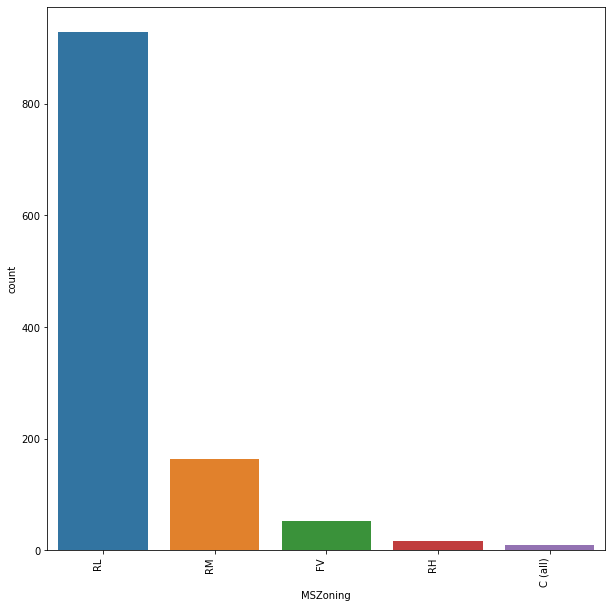

In [24]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['MSZoning'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

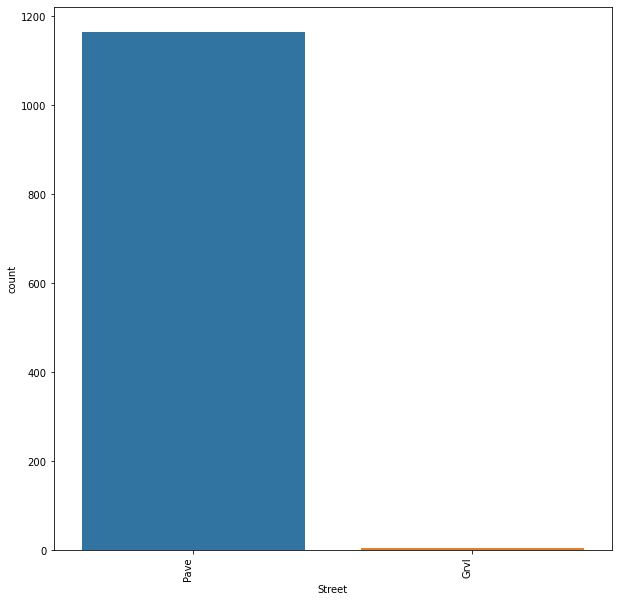

In [25]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Street'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

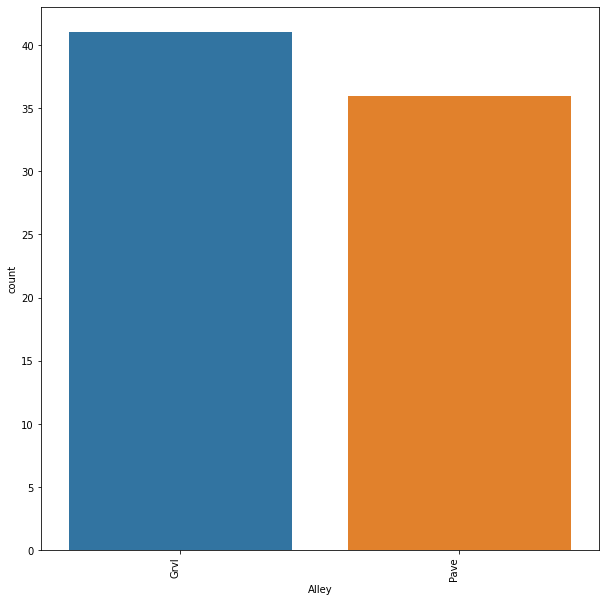

In [26]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Alley'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

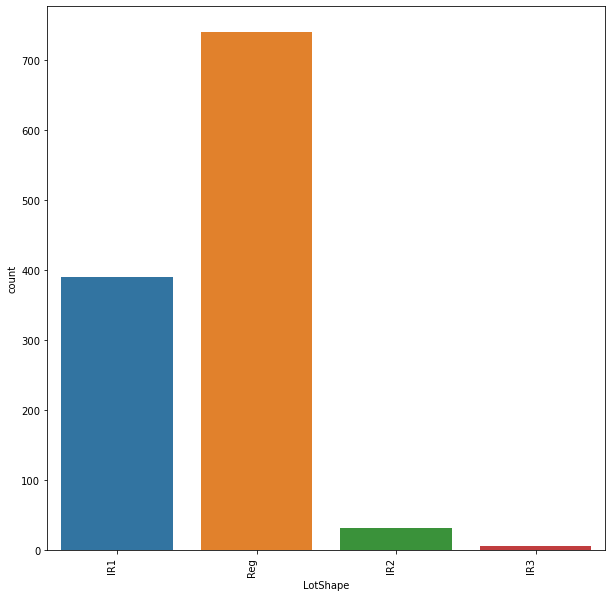

In [27]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['LotShape'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

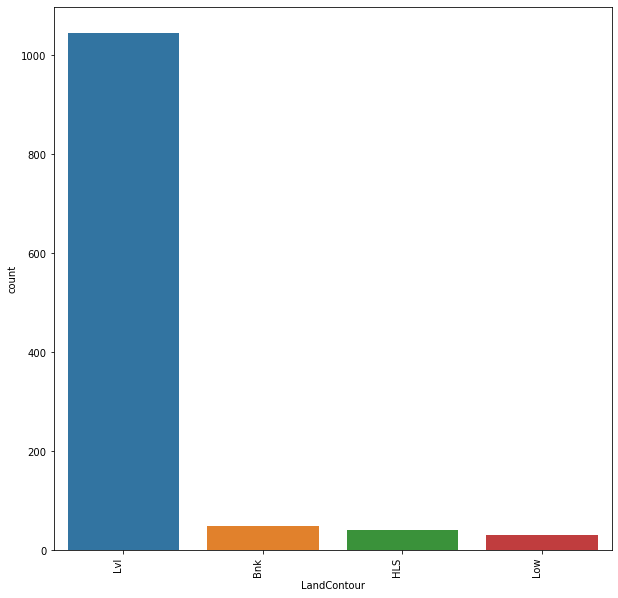

In [28]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['LandContour'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

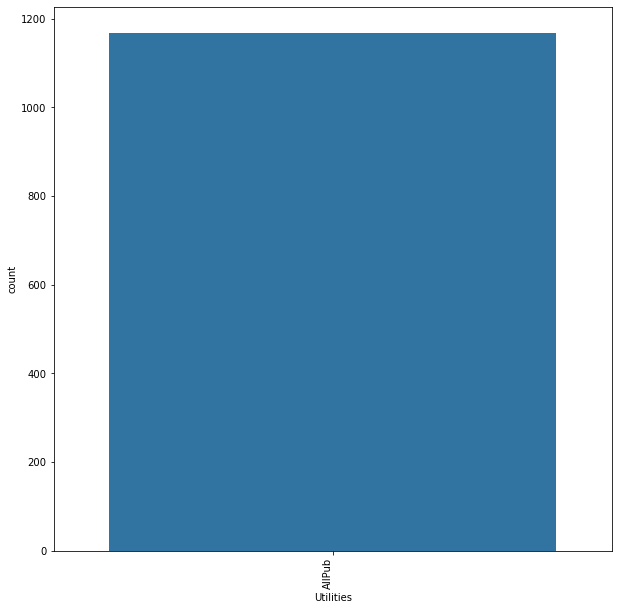

In [29]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Utilities'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

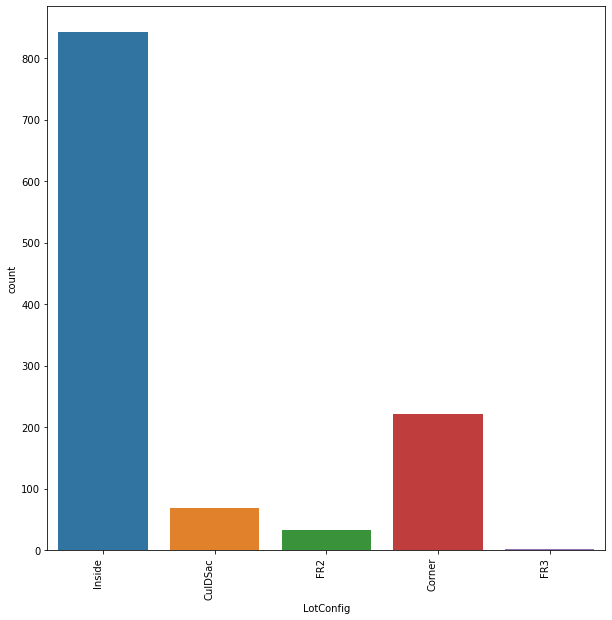

In [30]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['LotConfig'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

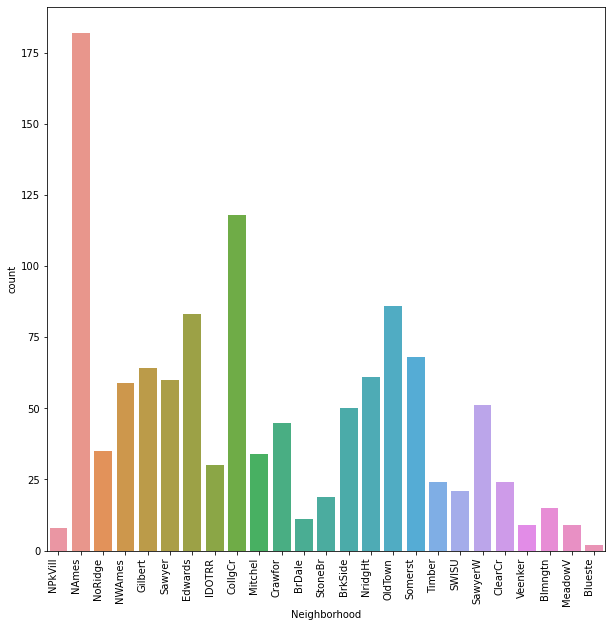

In [31]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Neighborhood'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

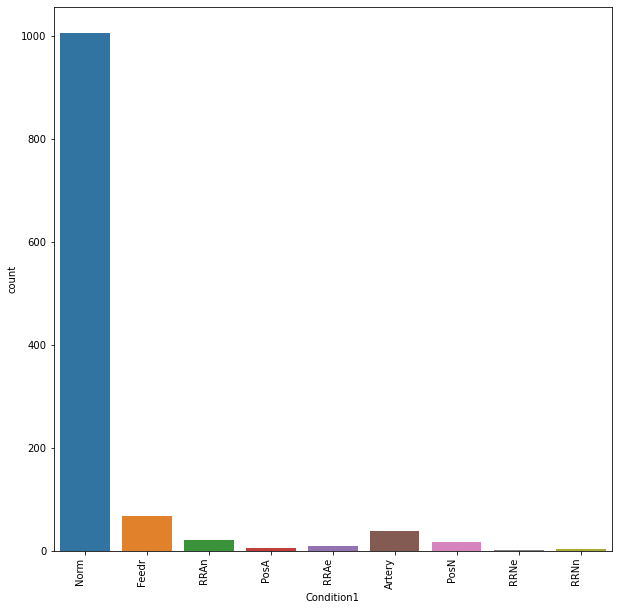

In [32]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Condition1'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

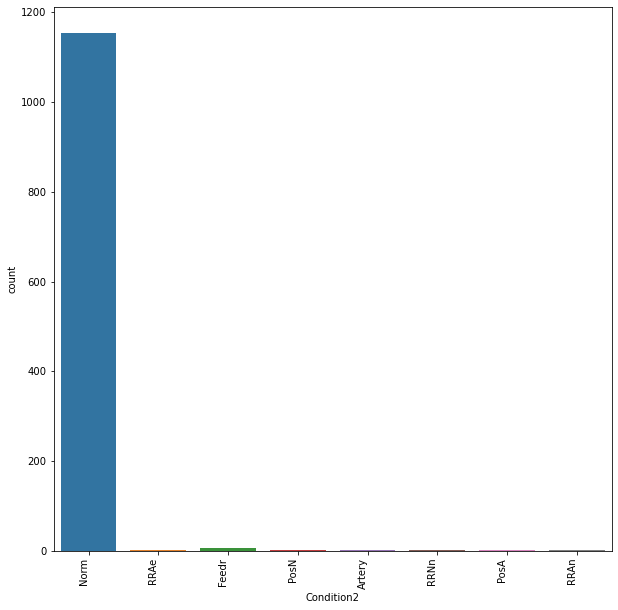

In [33]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Condition2'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

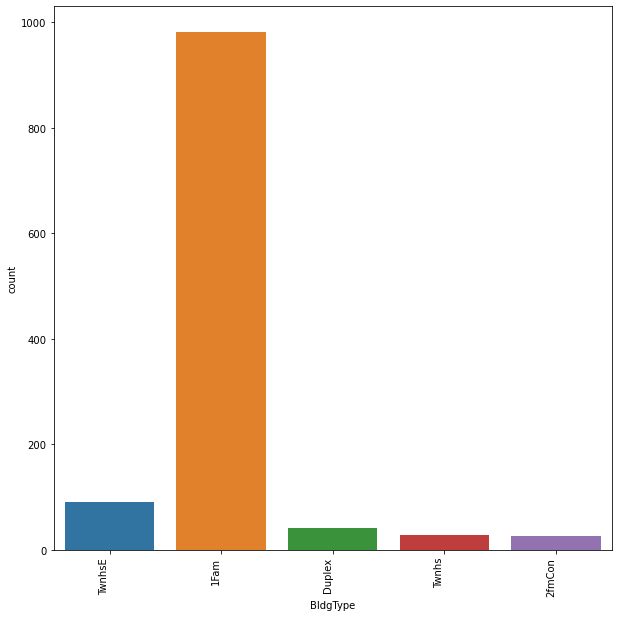

In [34]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['BldgType'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

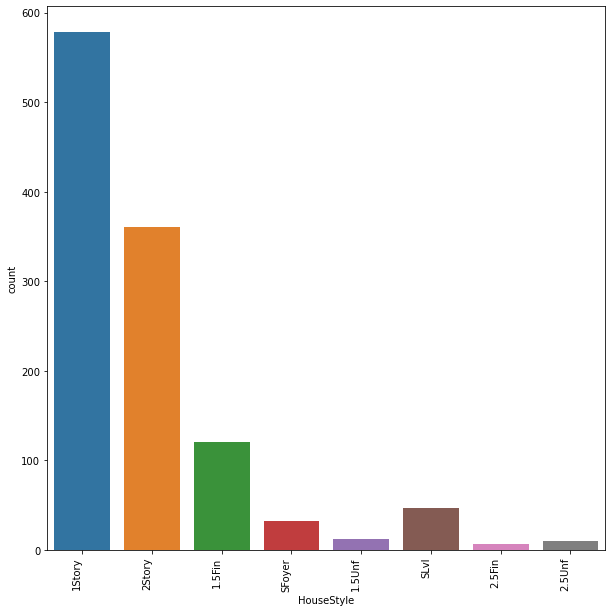

In [35]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['HouseStyle'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

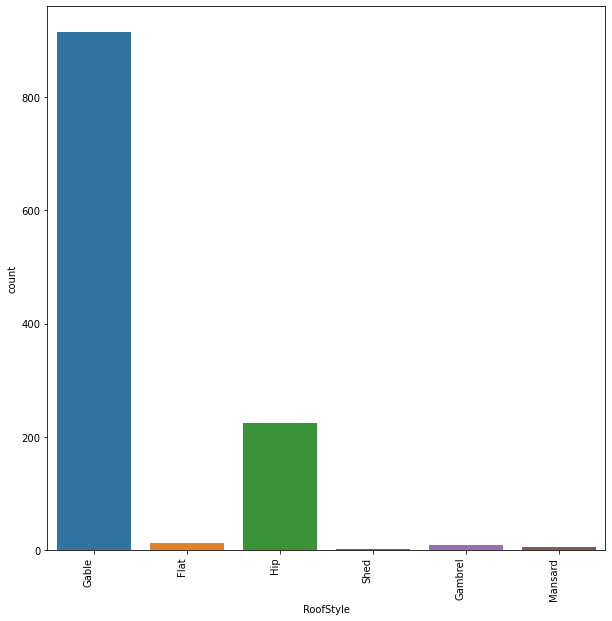

In [36]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['RoofStyle'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

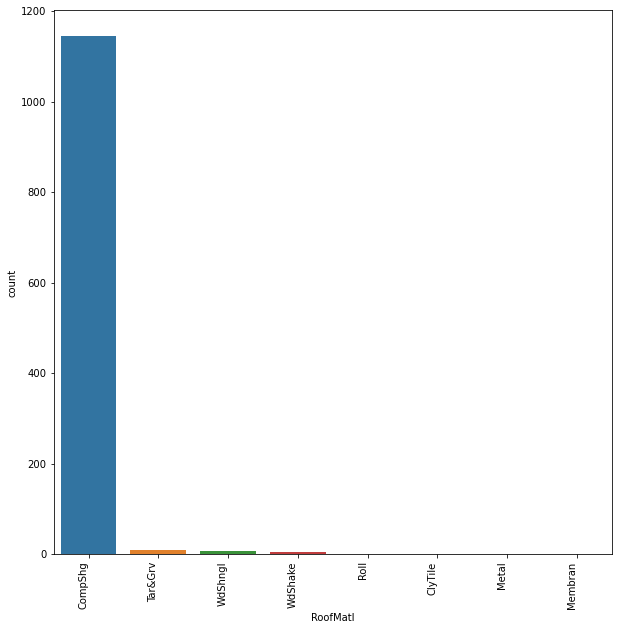

In [37]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['RoofMatl'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

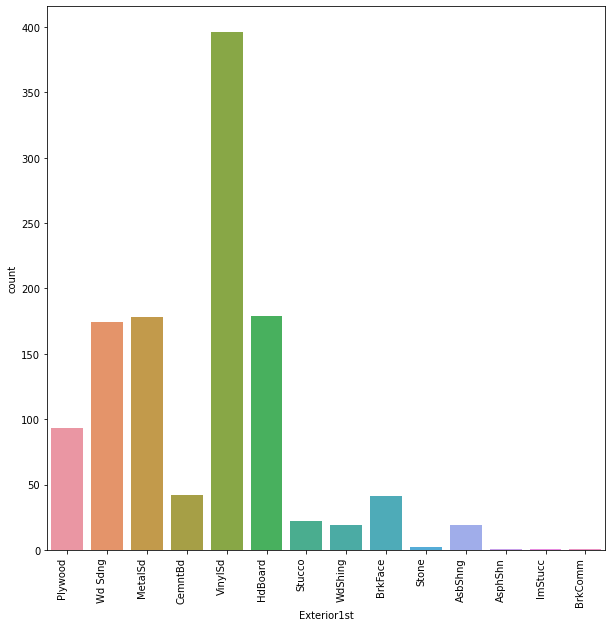

In [38]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Exterior1st'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

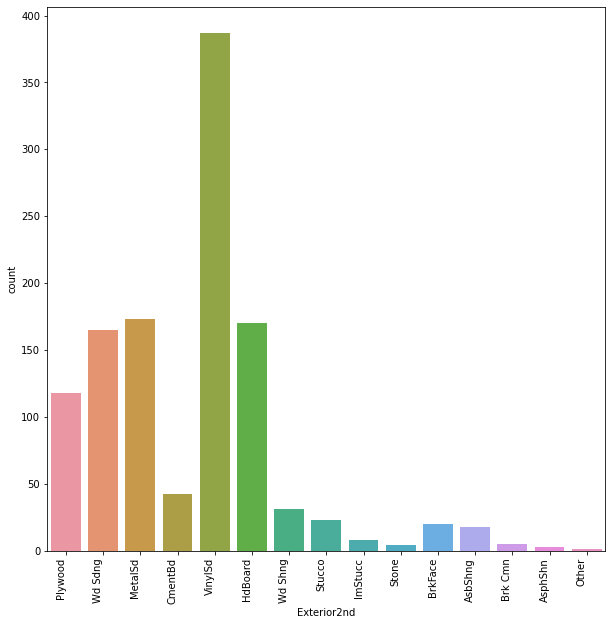

In [39]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Exterior2nd'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

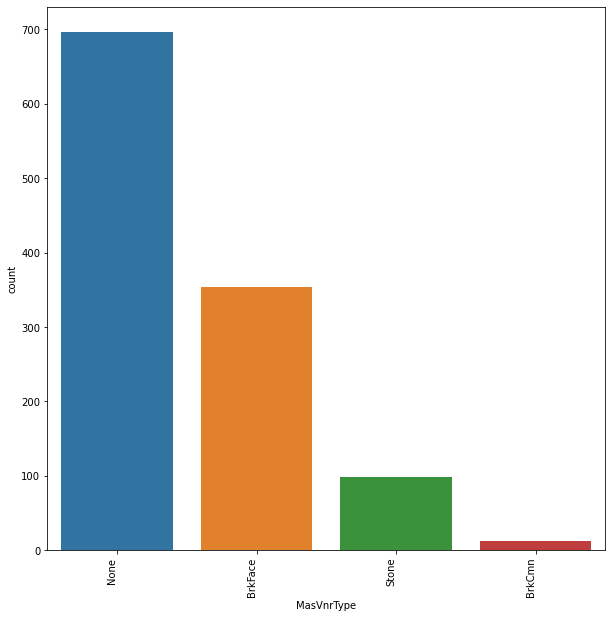

In [40]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['MasVnrType'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

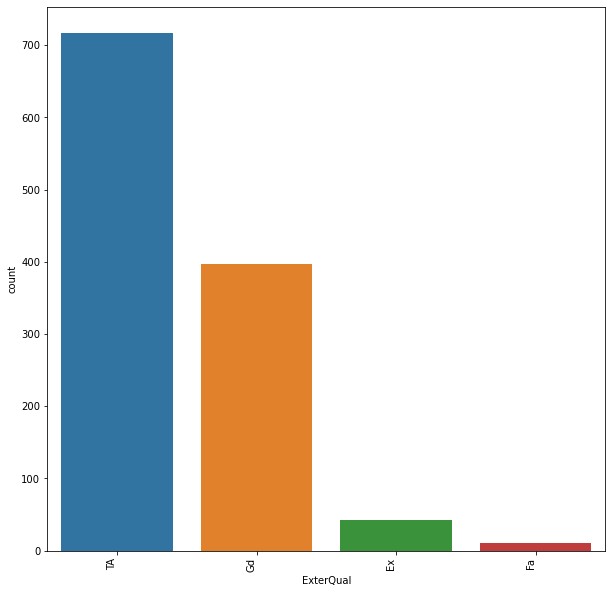

In [41]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['ExterQual'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

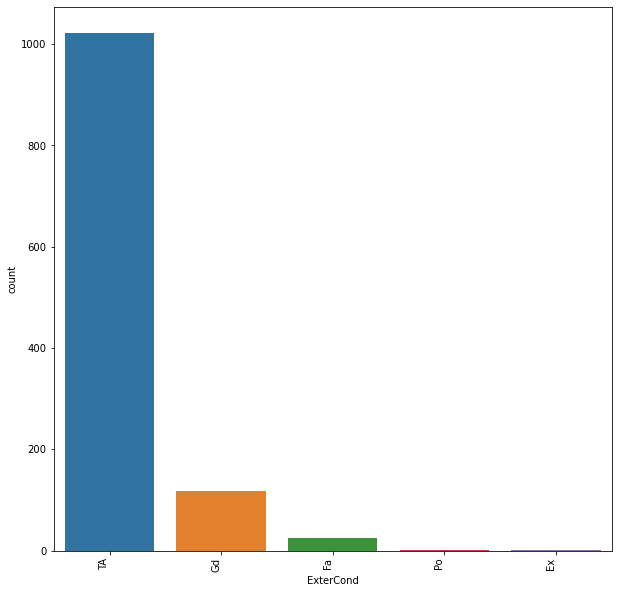

In [42]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['ExterCond'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [ ]:
The TA is the highest in the extercondition

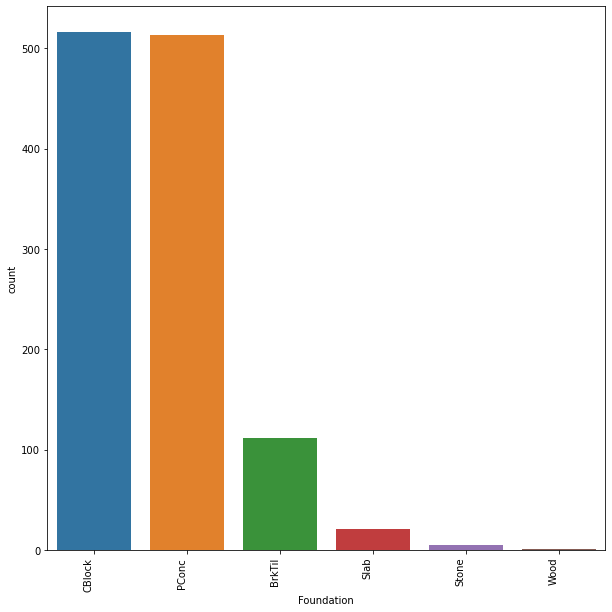

In [43]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Foundation'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

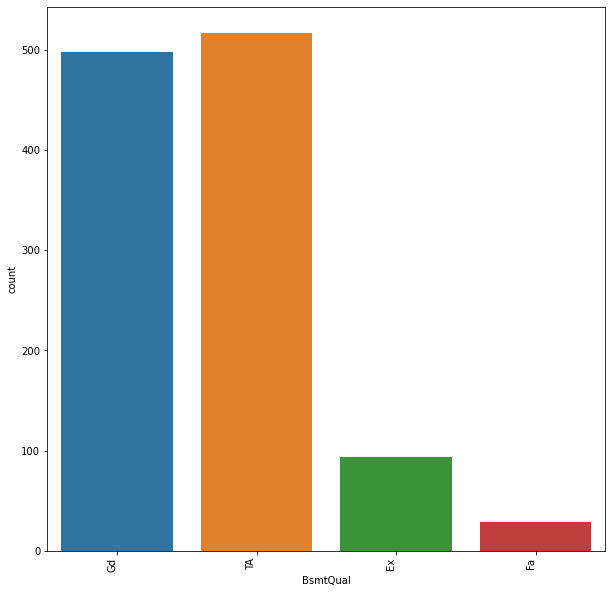

In [44]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['BsmtQual'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

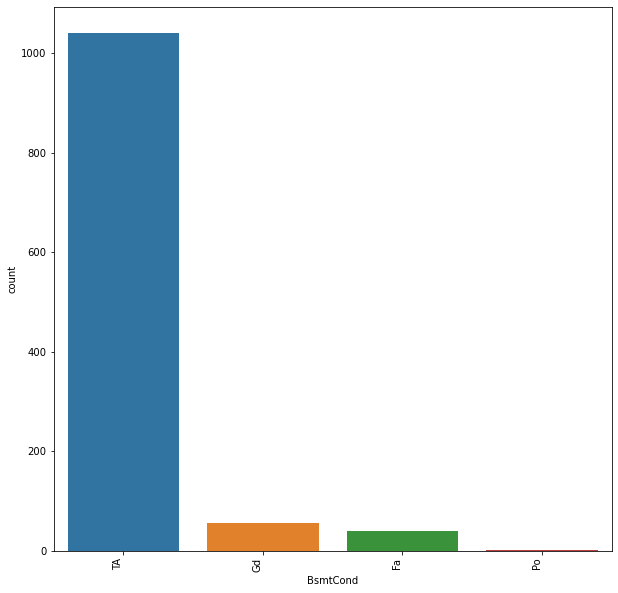

In [45]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['BsmtCond'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

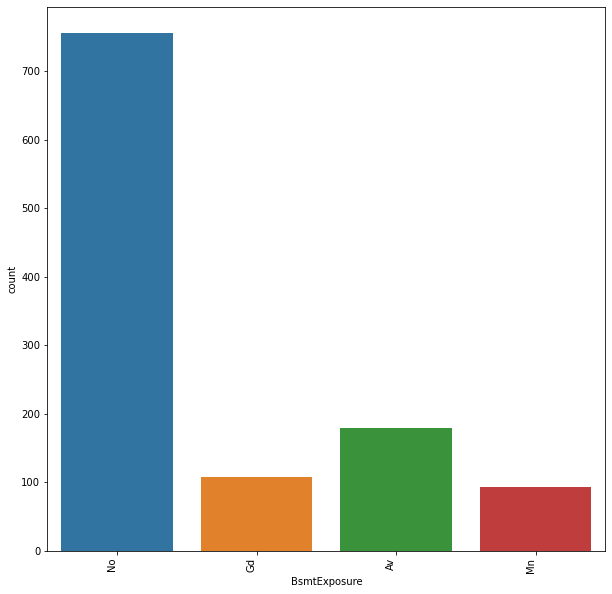

In [46]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['BsmtExposure'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

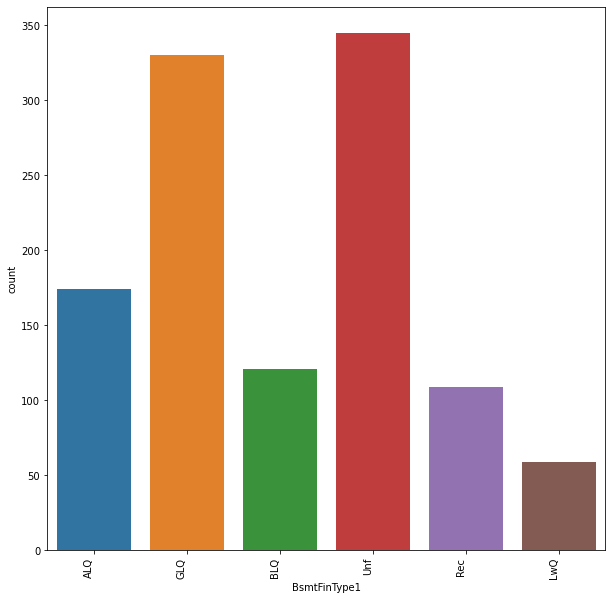

In [47]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['BsmtFinType1'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

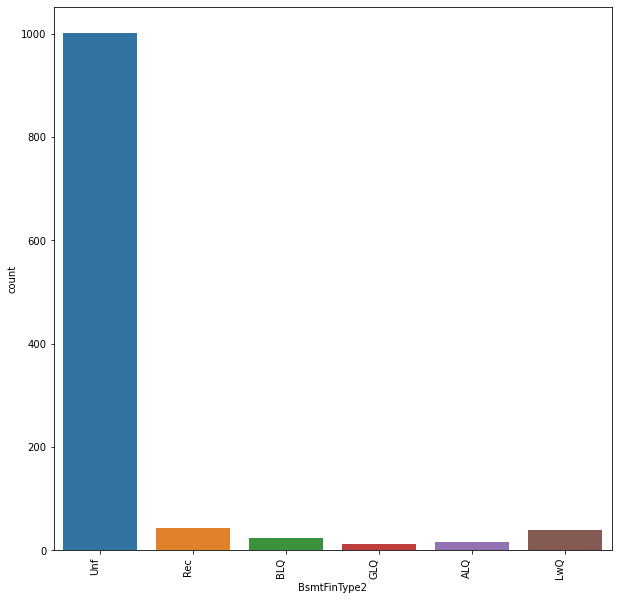

In [48]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['BsmtFinType2'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

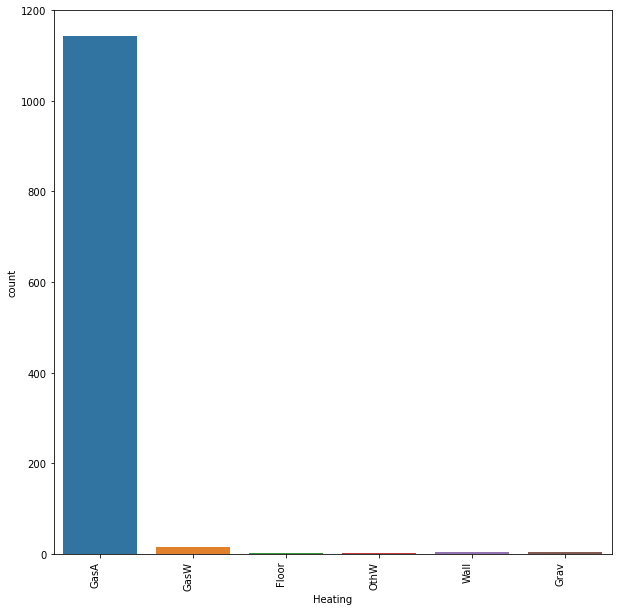

In [49]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Heating'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

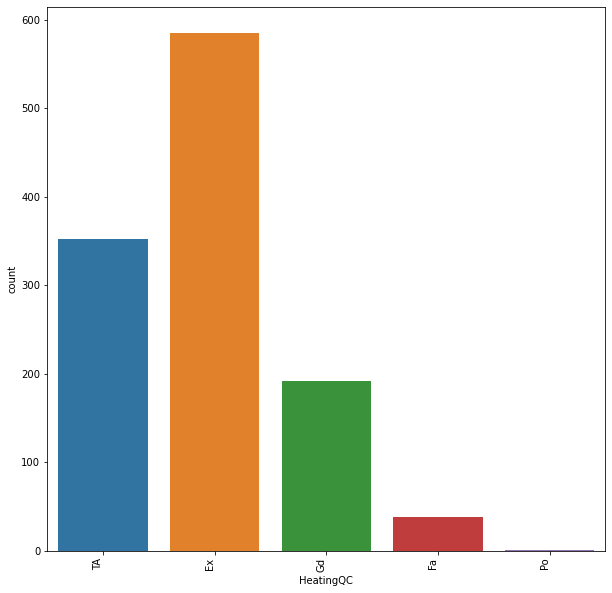

In [50]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['HeatingQC'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

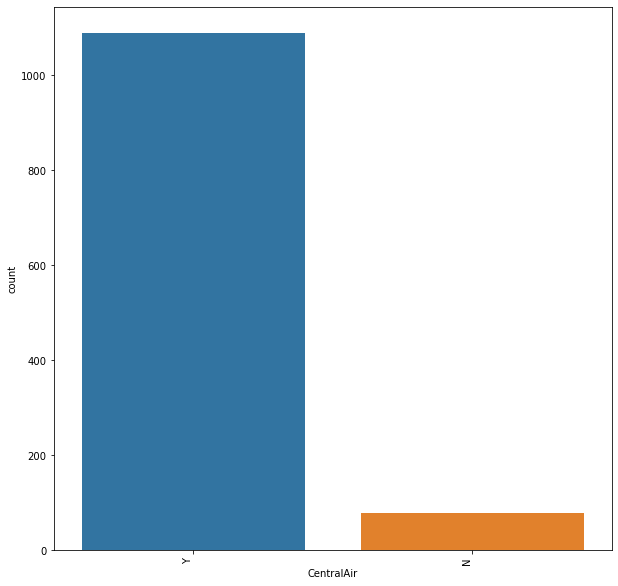

In [51]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['CentralAir'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

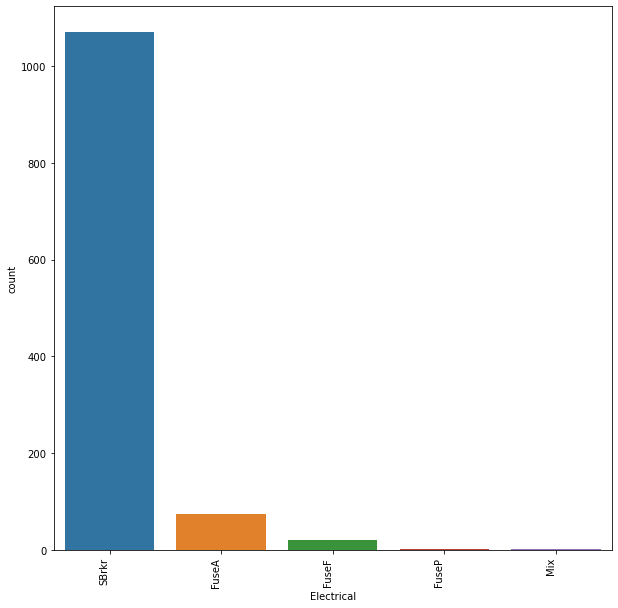

In [52]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Electrical'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

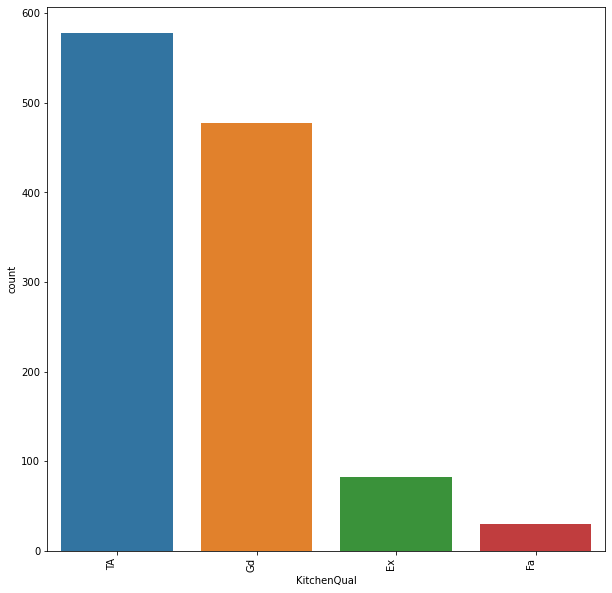

In [53]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['KitchenQual'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

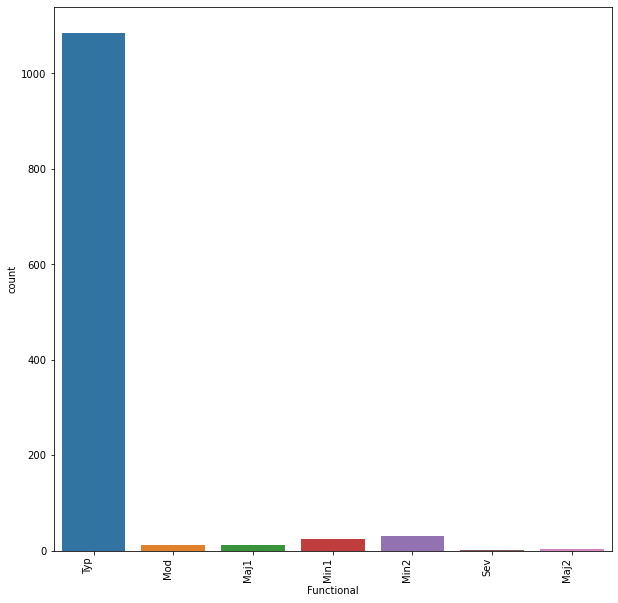

In [54]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Functional'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

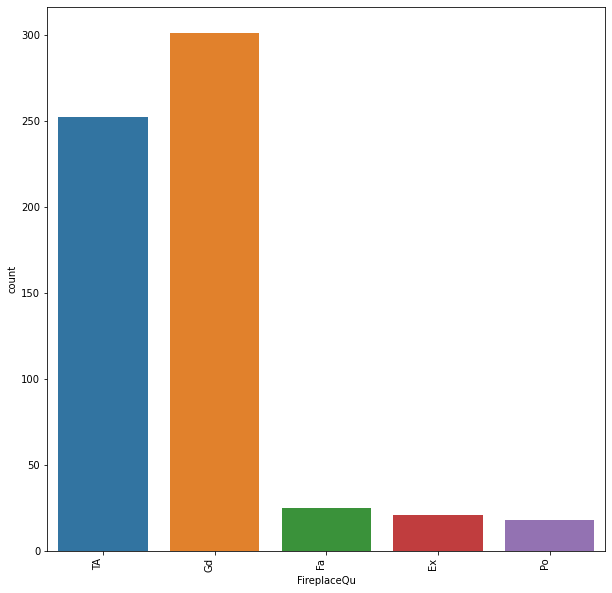

In [55]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['FireplaceQu'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

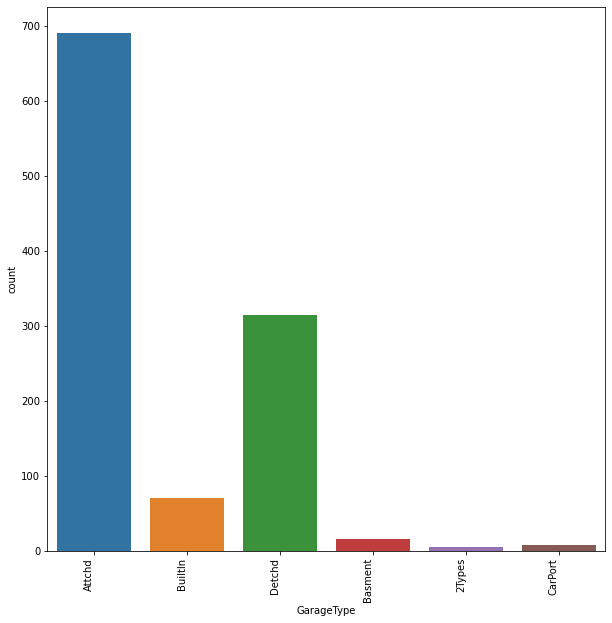

In [56]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['GarageType'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

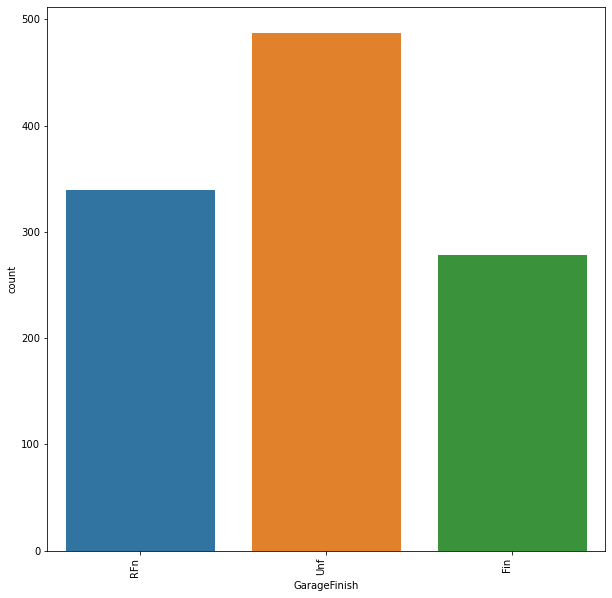

In [57]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['GarageFinish'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

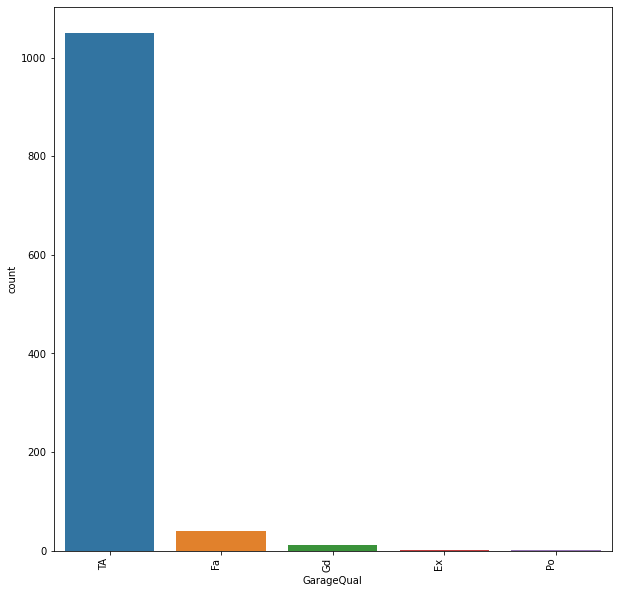

In [58]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['GarageQual'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

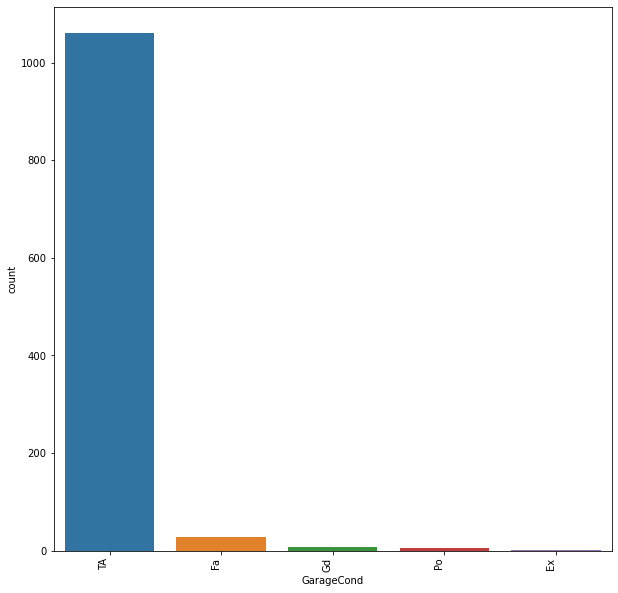

In [59]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['GarageCond'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

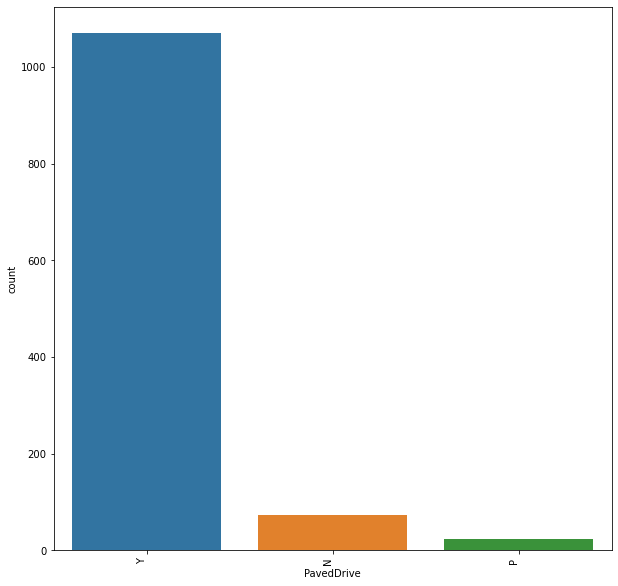

In [60]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['PavedDrive'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

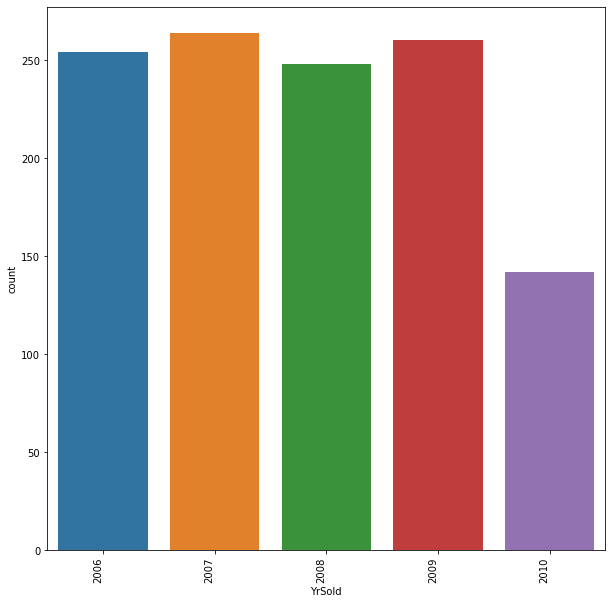

In [61]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['YrSold'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

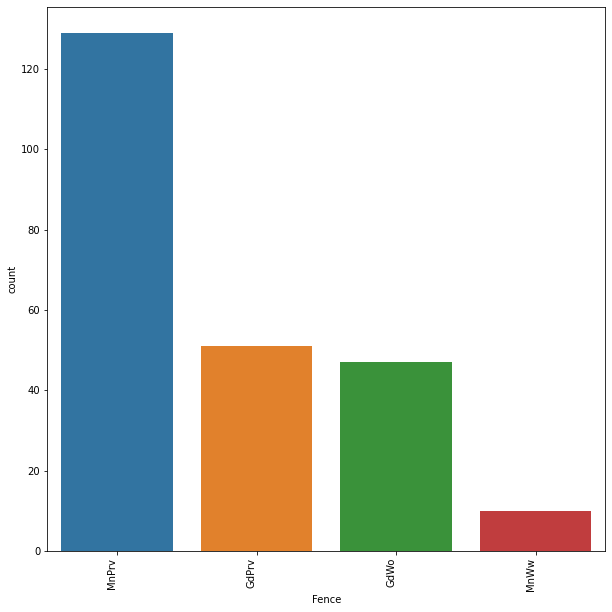

In [62]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['Fence'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

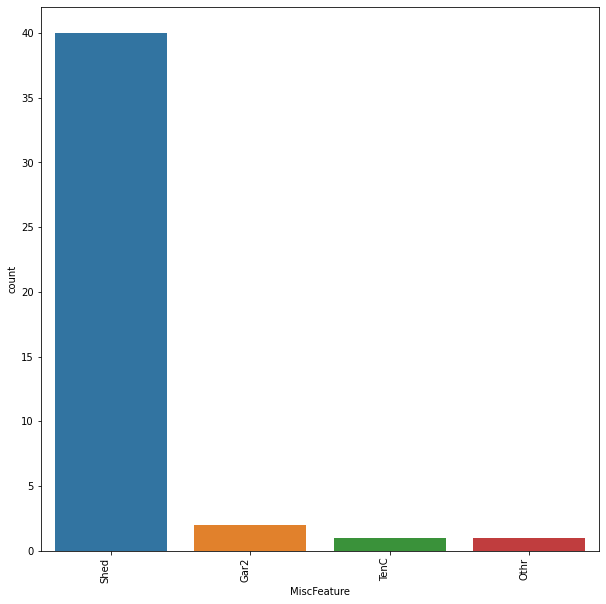

In [63]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['MiscFeature'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

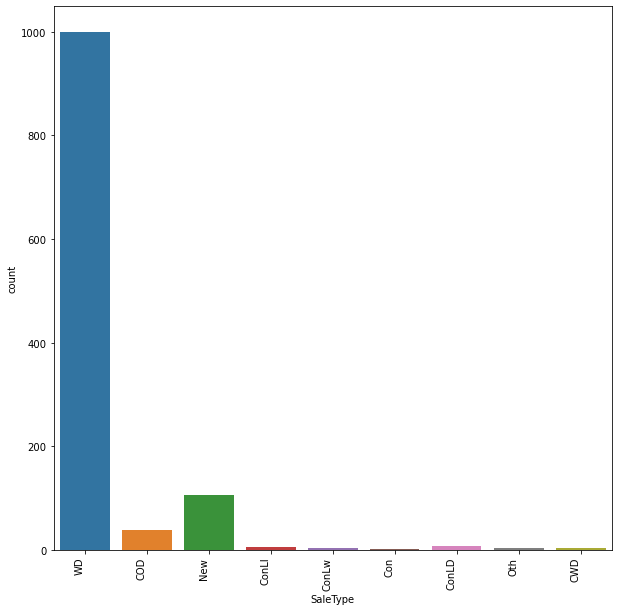

In [64]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['SaleType'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

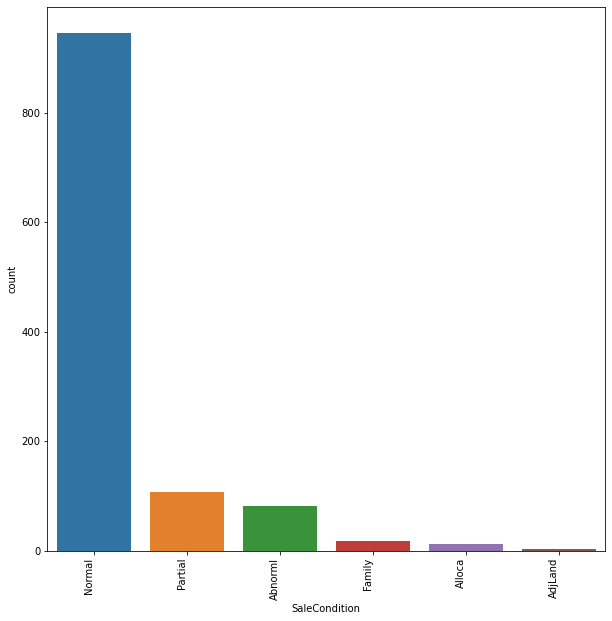

In [65]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt1['SaleCondition'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

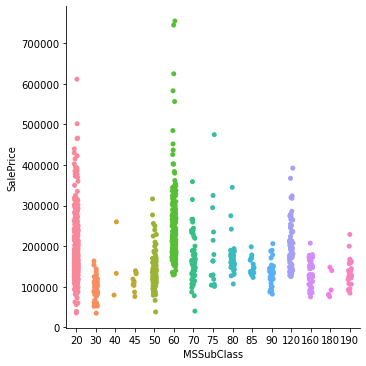

In [66]:
sns.catplot(x='MSSubClass', y='SalePrice', data=dt1)

In [70]:
#To compare the other kinds of graph Dtale is used and reported in the report.
import dtale
import pandas as pd
df = pd.read_csv('train.csv')
d = dtale.show(dt1)
d.open_browser()

In [ ]:
#Replacing the NAN values and Statical analysis of the contineuous datatypes in data set

In [1324]:
dt1['LotFrontage'].median()

70.0

<AxesSubplot:ylabel='Density'>

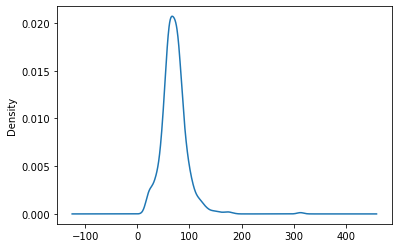

In [1325]:
dt1['LotFrontage'].plot(kind='kde')

In [1326]:
dt1['LotFrontage'].isna().sum()

214

In [1327]:
dt1['LotFrontage']=dt1['LotFrontage'].fillna(dt1['LotFrontage'].median())
dt['LotFrontage']=dt['LotFrontage'].fillna(dt['LotFrontage'].median())

In [1328]:
dt1['LotFrontage'].isna().sum()

0

<AxesSubplot:>

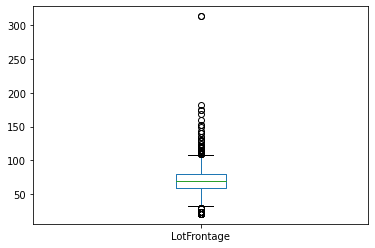

In [1329]:
dt1['LotFrontage'].plot(kind='box')

In [1330]:
q1=dt1['LotFrontage'].quantile(0.25)
q3=dt1['LotFrontage'].quantile(0.75)
iqr=q3-q1

In [1331]:
l_h=(q3+(1.5*iqr))
l_h

108.125

In [1332]:
index=np.where(dt['LotFrontage']>l_h)
index

(array([ 14,  58,  99, 157, 165, 175, 235, 273], dtype=int64),)

In [1333]:
dt1['LotFrontage'].iloc[index]=dt1['LotFrontage'].median()

<AxesSubplot:ylabel='Density'>

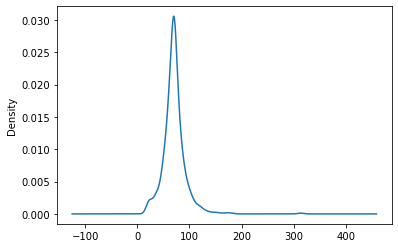

In [1334]:
dt1['LotFrontage'].plot(kind='kde')

In [1335]:
IQR=dt['LotFrontage'].quantile(0.75)-dt['LotFrontage'].quantile(0.25)
lower_bridge=dt['LotFrontage'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['LotFrontage'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

30.375 103.375


In [1336]:
dt.loc[dt['LotFrontage']>=99,'LotFrontage']=99
dt.loc[dt['LotFrontage']<=33,'LotFrontage']=33

<AxesSubplot:>

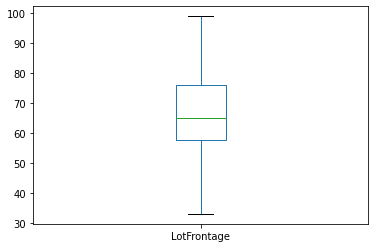

In [1337]:
dt['LotFrontage'].plot(kind='box')

In [1338]:
IQR=dt1['LotFrontage'].quantile(0.75)-dt1['LotFrontage'].quantile(0.25)
lower_bridge=dt1['LotFrontage'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['LotFrontage'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

31.5 107.5


In [1339]:
dt1.loc[dt1['LotFrontage']>=107.5,'LotFrontage']=107.5
dt1.loc[dt1['LotFrontage']<=31.5,'LotFrontage']=31.5

<AxesSubplot:>

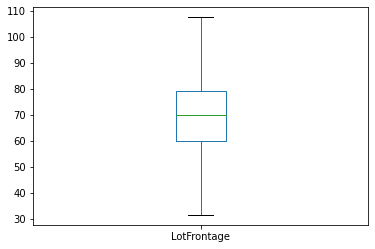

In [1340]:
dt1['LotFrontage'].plot(kind='box')

In [1341]:
dt1['MasVnrType']=dt1['MasVnrType'].fillna(dt1['MasVnrType'].mode()[0])
dt['MasVnrType']=dt['MasVnrType'].fillna(dt['MasVnrType'].mode()[0])

In [1342]:
dt1['MasVnrType'].isna().sum()

0

In [1343]:
dt1['MasVnrArea']=dt1['MasVnrArea'].fillna(dt1['MasVnrArea'].median())
dt['MasVnrArea']=dt['MasVnrArea'].fillna(dt['MasVnrArea'].median())

<AxesSubplot:>

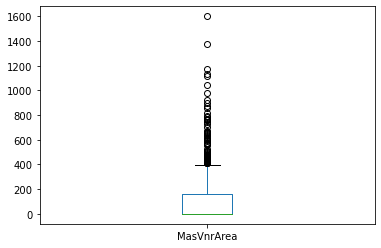

In [1344]:
dt1['MasVnrArea'].plot(kind='box')

In [1345]:
IQR=dt1['MasVnrArea'].quantile(0.75)-dt1['MasVnrArea'].quantile(0.25)
lower_bridge=dt1['MasVnrArea'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['MasVnrArea'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-240.0 400.0


In [1346]:
dt1.loc[dt1['MasVnrArea']>=400.0,'MasVnrArea']=400.0
dt1.loc[dt1['MasVnrArea']<=-240.0,'MasVnrArea']=-240.0

<AxesSubplot:>

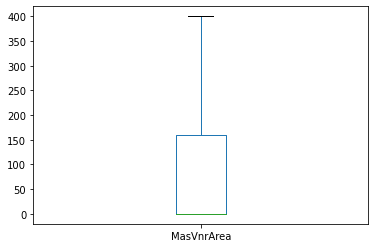

In [1347]:
dt1['MasVnrArea'].plot(kind='box')

In [1348]:
IQR=dt['MasVnrArea'].quantile(0.75)-dt['MasVnrArea'].quantile(0.25)
lower_bridge=dt['MasVnrArea'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['MasVnrArea'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-270.0 450.0


In [1349]:
dt.loc[dt['MasVnrArea']>=400.0,'MasVnrArea']=400.0
dt.loc[dt['MasVnrArea']<=-240.0,'MasVnrArea']=-240.0

<AxesSubplot:>

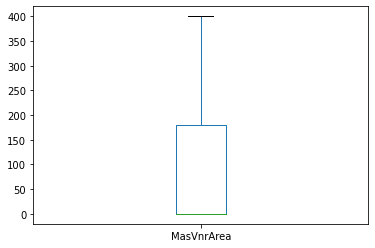

In [1350]:
dt['MasVnrArea'].plot(kind='box')

In [1351]:
dt1['BsmtQual']=dt1['BsmtQual'].fillna(dt1['BsmtQual'].mode()[0])
dt['BsmtQual']=dt['BsmtQual'].fillna(dt['BsmtQual'].mode()[0])

In [1352]:
dt1['BsmtCond']=dt1['BsmtCond'].fillna(dt1['BsmtCond'].mode()[0])
dt['BsmtCond']=dt['BsmtCond'].fillna(dt['BsmtCond'].mode()[0])

In [1353]:
dt1['BsmtExposure']=dt1['BsmtExposure'].fillna(dt1['BsmtExposure'].mode()[0])
dt['BsmtExposure']=dt['BsmtExposure'].fillna(dt['BsmtExposure'].mode()[0])

In [1354]:
dt1['BsmtFinType1']=dt1['BsmtFinType1'].fillna(dt1['BsmtFinType1'].mode()[0])
dt['BsmtFinType1']=dt['BsmtFinType1'].fillna(dt['BsmtFinType1'].mode()[0])

In [1355]:
dt1['BsmtFinType2']=dt1['BsmtFinType2'].fillna(dt1['BsmtFinType2'].mode()[0])
dt['BsmtFinType2']=dt['BsmtFinType2'].fillna(dt['BsmtFinType2'].mode()[0])

In [1356]:
dt1['FireplaceQu']=dt1['FireplaceQu'].fillna(dt1['FireplaceQu'].mode()[0])
dt['FireplaceQu']=dt['FireplaceQu'].fillna(dt['FireplaceQu'].mode()[0])

In [1357]:
dt1['GarageType']=dt1['GarageType'].fillna(dt1['GarageType'].mode()[0])
dt['GarageType']=dt['GarageType'].fillna(dt['GarageType'].mode()[0])

In [1358]:
dt1['GarageFinish']=dt1['GarageFinish'].fillna(dt1['GarageFinish'].mode()[0])
dt['GarageFinish']=dt['GarageFinish'].fillna(dt['GarageFinish'].mode()[0])

In [1359]:
dt1['GarageQual']=dt1['GarageQual'].fillna(dt1['GarageQual'].mode()[0])
dt['GarageQual']=dt['GarageQual'].fillna(dt['GarageQual'].mode()[0])

In [1360]:
dt1['GarageCond']=dt1['GarageCond'].fillna(dt1['GarageCond'].mode()[0])
dt['GarageCond']=dt['GarageCond'].fillna(dt['GarageCond'].mode()[0])

<AxesSubplot:ylabel='Density'>

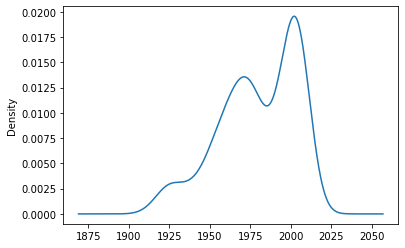

In [1361]:
dt['GarageYrBlt'].plot(kind='kde')

<AxesSubplot:>

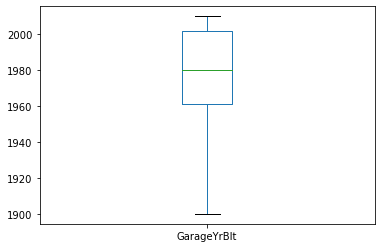

In [1362]:
dt1['GarageYrBlt'].plot(kind='box')

In [1363]:
dt1['GarageYrBlt'].fillna(dt1['GarageYrBlt'].median(), inplace=True)
dt['GarageYrBlt'].fillna(dt['GarageYrBlt'].median(), inplace=True)

<AxesSubplot:>

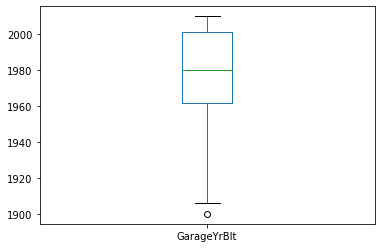

In [1364]:
dt1['GarageYrBlt'].plot(kind='box')

In [1365]:
IQR=dt1['GarageYrBlt'].quantile(0.75)-dt1['GarageYrBlt'].quantile(0.25)
lower_bridge=dt1['GarageYrBlt'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['GarageYrBlt'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1903.5 2059.5


In [1366]:
dt1.loc[dt1['GarageYrBlt']>=2059.5,'GarageYrBlt']=2059.5
dt1.loc[dt1['GarageYrBlt']<=1903.5,'GarageYrBlt']=1903.5

<AxesSubplot:>

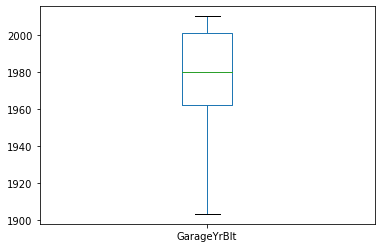

In [1367]:
dt1['GarageYrBlt'].plot(kind='box')

In [1368]:
IQR=dt['GarageYrBlt'].quantile(0.75)-dt['GarageYrBlt'].quantile(0.25)
lower_bridge=dt['GarageYrBlt'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['GarageYrBlt'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1909.5 2057.5


In [1369]:
dt.loc[dt['GarageYrBlt']>=2057.5,'GarageYrBlt']=2057.5
dt.loc[dt['GarageYrBlt']<=1909.5,'GarageYrBlt']=1909.5

<AxesSubplot:>

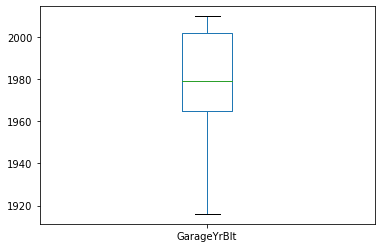

In [1370]:
dt['GarageYrBlt'].plot(kind='box')

In [1371]:
print ('The null values in the dataset is', dt1['Alley'].isna().sum(), dt1['PoolQC'].isna().sum(), dt1['Fence'].isna().sum(), dt1['MiscFeature'].isna().sum())

The null values in the dataset is 1091 1161 931 1124


In [1372]:
dt1.shape

(1168, 81)

In [1373]:
dt1.drop(columns=['Utilities','Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True)

In [1374]:
dt.drop(columns=['Utilities','Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True)

In [1375]:
dt['Electrical'].fillna(dt['Electrical'].mode()[0],inplace=True)

In [1376]:
for col in dt1:
    print ('This column', col ,'has', dt1[col].isna().sum(),'NAN elements')
    print ('*'*100)
print('-+-'*166)
for col in dt:
    print ('This column', col ,'has', dt[col].isna().sum(),'NAN elements')
    print ('*'*100)

This column Id has 0 NAN elements
****************************************************************************************************
This column MSSubClass has 0 NAN elements
****************************************************************************************************
This column MSZoning has 0 NAN elements
****************************************************************************************************
This column LotFrontage has 0 NAN elements
****************************************************************************************************
This column LotArea has 0 NAN elements
****************************************************************************************************
This column Street has 0 NAN elements
****************************************************************************************************
This column LotShape has 0 NAN elements
****************************************************************************************************
This column LandC

In [1377]:
dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,IR1,HLS,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,0,7,2007,WD,Normal
1,1018,120,RL,65.0,5814,Pave,IR1,Lvl,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,0,8,2009,COD,Abnorml
2,929,20,RL,65.0,11838,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,Reg,Bnk,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,IR1,Lvl,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,400.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,IR2,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,Gd,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,0,2,2008,WD,Normal
289,17,20,RL,65.0,11241,Pave,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,Reg,Lvl,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,0,10,2006,WD,Normal


In [1378]:
dt1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,400.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,70.0,9819,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,Gd,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,Reg,Lvl,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,Gd,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,0,5,2009,WD,Normal,108000
1165,196,160,RL,31.5,2280,Pave,Reg,Lvl,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,Gd,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,0,7,2008,WD,Normal,40000


<AxesSubplot:>

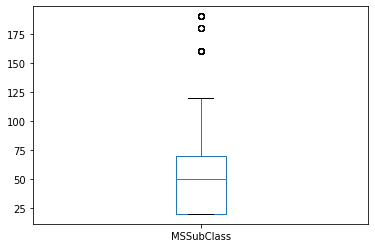

In [1379]:
dt1['MSSubClass'].plot(kind='box')

In [1380]:
IQR=dt1['MSSubClass'].quantile(0.75)-dt1['MSSubClass'].quantile(0.25)
lower_bridge=dt1['MSSubClass'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['MSSubClass'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-55.0 145.0


In [1381]:
dt1.loc[dt1['MSSubClass']>=145.0,'MSSubClass']=145.0
dt1.loc[dt1['MSSubClass']<=-55.0,'MSSubClass']=-55.0

<AxesSubplot:>

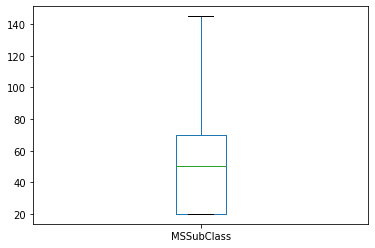

In [1382]:
dt1['MSSubClass'].plot(kind='box')

In [1383]:
IQR=dt['MSSubClass'].quantile(0.75)-dt['MSSubClass'].quantile(0.25)
lower_bridge=dt['MSSubClass'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['MSSubClass'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-55.0 145.0


In [1384]:
dt.loc[dt['MSSubClass']>=145.0,'MSSubClass']=145.0
dt.loc[dt['MSSubClass']<=-55.0,'MSSubClass']=-55.0

<AxesSubplot:>

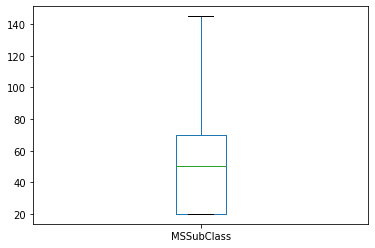

In [1385]:
dt['MSSubClass'].plot(kind='box')

<AxesSubplot:>

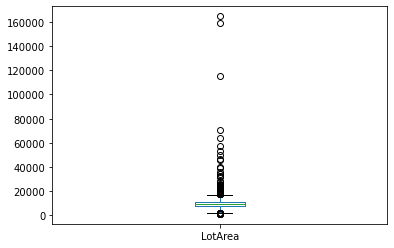

In [1386]:
dt1['LotArea'].plot(kind='box')

In [1387]:
IQR=dt1['LotArea'].quantile(0.75)-dt1['LotArea'].quantile(0.25)
lower_bridge=dt1['LotArea'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['LotArea'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1780.5 17356.5


In [1388]:
dt1.loc[dt1['LotArea']>=17356.5,'LotArea']=17356.5
dt1.loc[dt1['LotArea']<=1780.5,'LotArea']=1780.5

<AxesSubplot:>

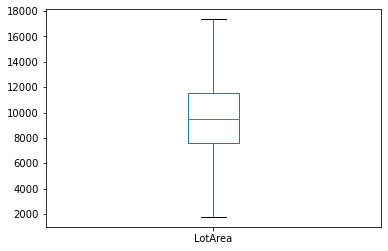

In [1389]:
dt1['LotArea'].plot(kind='box')

In [1390]:
IQR=dt['LotArea'].quantile(0.75)-dt['LotArea'].quantile(0.25)
lower_bridge=dt['LotArea'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['LotArea'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

511.875 18346.875


In [1391]:
dt.loc[dt['LotArea']>= 18346.875,'LotArea']= 18346.875
dt.loc[dt['LotArea']<=511.875,'LotArea']=511.875

<AxesSubplot:>

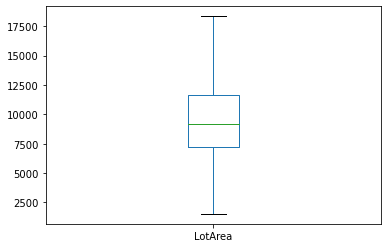

In [1392]:
dt['LotArea'].plot(kind='box')

<AxesSubplot:>

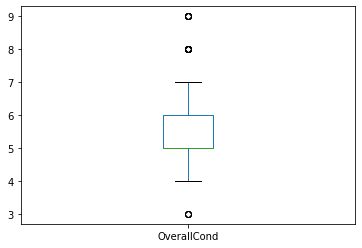

In [1393]:
dt['OverallCond'].plot(kind='box')

In [1394]:
IQR=dt1['OverallCond'].quantile(0.75)-dt1['OverallCond'].quantile(0.25)
lower_bridge=dt1['OverallCond'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['OverallCond'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

3.5 7.5


In [1395]:
dt1.loc[dt1['OverallCond']>=7.5,'OverallCond']=7.5
dt1.loc[dt1['OverallCond']<=3.5,'OverallCond']=3.5

<AxesSubplot:>

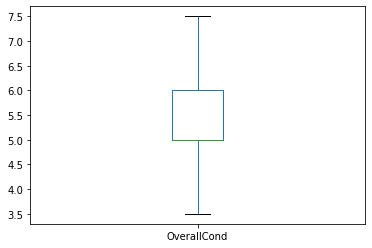

In [1396]:
dt1['OverallCond'].plot(kind='box')

In [1397]:
IQR=dt['OverallCond'].quantile(0.75)-dt['OverallCond'].quantile(0.25)
lower_bridge=dt['OverallCond'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['OverallCond'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

3.5 7.5


In [1398]:
dt.loc[dt['OverallCond']>=7.5,'OverallCond']=7.5
dt.loc[dt['OverallCond']<=3.5,'OverallCond']=3.5

<AxesSubplot:>

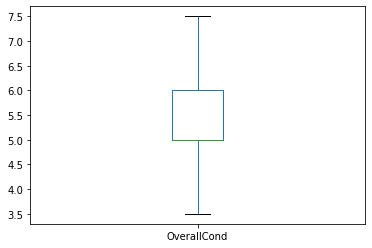

In [1399]:
dt['OverallCond'].plot(kind='box')

<AxesSubplot:>

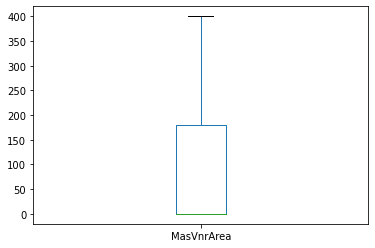

In [1400]:
dt['MasVnrArea'].plot(kind='box')

<AxesSubplot:>

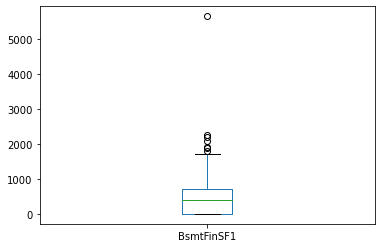

In [1401]:
dt1['BsmtFinSF1'].plot(kind='box')

In [1402]:
IQR=dt1['BsmtFinSF1'].quantile(0.75)-dt1['BsmtFinSF1'].quantile(0.25)
lower_bridge=dt1['BsmtFinSF1'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['BsmtFinSF1'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1071.75 1786.25


In [1403]:
dt1.loc[dt1['BsmtFinSF1']>=1786.25,'BsmtFinSF1']=1786.25
dt1.loc[dt1['BsmtFinSF1']<=-1071.75,'BsmtFinSF1']=-1071.75

<AxesSubplot:>

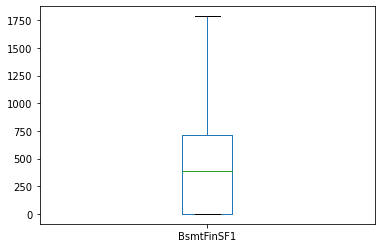

In [1404]:
dt1['BsmtFinSF1'].plot(kind='box')

In [1405]:
IQR=dt['BsmtFinSF1'].quantile(0.75)-dt['BsmtFinSF1'].quantile(0.25)
lower_bridge=dt['BsmtFinSF1'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['BsmtFinSF1'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1050.75 1751.25


In [1406]:
dt.loc[dt['BsmtFinSF1']>=1786.25,'BsmtFinSF1']=1786.25
dt.loc[dt['BsmtFinSF1']<=-1071.75,'BsmtFinSF1']=-1071.75

<AxesSubplot:>

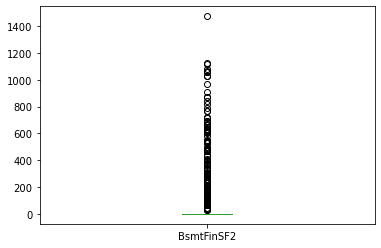

In [1407]:
dt1['BsmtFinSF2'].plot(kind='box')

In [1408]:
IQR=dt1['BsmtFinSF2'].quantile(0.75)-dt1['BsmtFinSF2'].quantile(0.25)
lower_bridge=dt1['BsmtFinSF2'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['BsmtFinSF2'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.0 0.0


<AxesSubplot:>

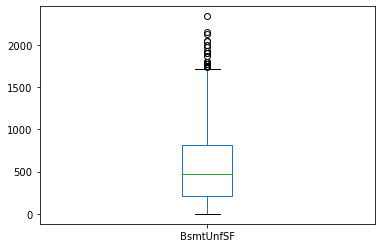

In [1409]:
dt1['BsmtUnfSF'].plot(kind='box')

In [1410]:
IQR=dt1['BsmtUnfSF'].quantile(0.75)-dt1['BsmtUnfSF'].quantile(0.25)
lower_bridge=dt1['BsmtUnfSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['BsmtUnfSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-684.0 1716.0


In [1411]:
dt1.loc[dt1['BsmtUnfSF']>=1716.0,'BsmtUnfSF']=1716.0
dt1.loc[dt1['BsmtUnfSF']<=-684.0,'BsmtUnfSF']=-684.0

<AxesSubplot:>

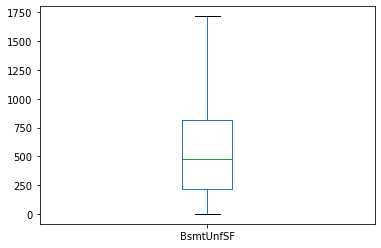

In [1412]:
dt1['BsmtUnfSF'].plot(kind='box')

In [1413]:
IQR=dt['BsmtUnfSF'].quantile(0.75)-dt['BsmtUnfSF'].quantile(0.25)
lower_bridge=dt['BsmtUnfSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['BsmtUnfSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-532.5 1567.5


In [1414]:
dt.loc[dt['BsmtUnfSF']>=1716.0,'BsmtUnfSF']=1716.0
dt.loc[dt['BsmtUnfSF']<=-684.0,'BsmtUnfSF']=-684.0

<AxesSubplot:>

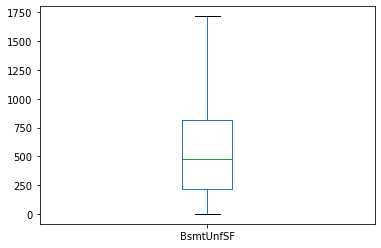

In [1415]:
dt1['BsmtUnfSF'].plot(kind='box')

<AxesSubplot:>

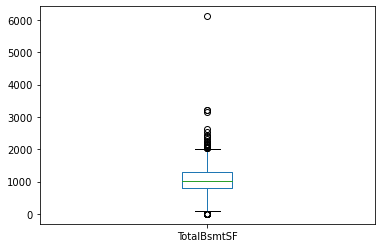

In [1416]:
dt1['TotalBsmtSF'].plot(kind='box')

In [1417]:
IQR=dt1['TotalBsmtSF'].quantile(0.75)-dt1['TotalBsmtSF'].quantile(0.25)
lower_bridge=dt1['TotalBsmtSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['TotalBsmtSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

60.25 2030.25


In [1418]:
dt1.loc[dt1['TotalBsmtSF']>=2030.25,'TotalBsmtSF']=2030.25
dt1.loc[dt1['TotalBsmtSF']<=60.25,'TotalBsmtSF']=60.25

<AxesSubplot:>

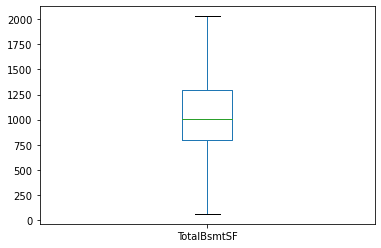

In [1419]:
dt1['TotalBsmtSF'].plot(kind='box')

In [1420]:
IQR=dt['TotalBsmtSF'].quantile(0.75)-dt['TotalBsmtSF'].quantile(0.25)
lower_bridge=dt['TotalBsmtSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['TotalBsmtSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-53.625 2147.375


In [1421]:
dt.loc[dt['TotalBsmtSF']>=2147.375,'TotalBsmtSF']=2147.375
dt.loc[dt['TotalBsmtSF']<=-53.625,'TotalBsmtSF']=-53.625

<AxesSubplot:>

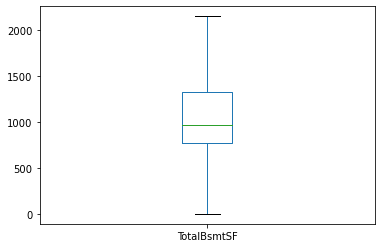

In [1422]:
dt['TotalBsmtSF'].plot(kind='box')

<AxesSubplot:>

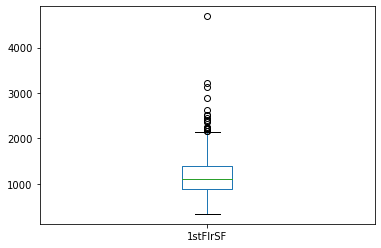

In [1423]:
dt1['1stFlrSF'].plot(kind='box')

In [1424]:
IQR=dt1['1stFlrSF'].quantile(0.75)-dt1['1stFlrSF'].quantile(0.25)
lower_bridge=dt1['1stFlrSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['1stFlrSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

142.0 2142.0


In [1425]:
dt1.loc[dt1['1stFlrSF']>=2142.0,'1stFlrSF']=2142.0
dt1.loc[dt1['1stFlrSF']<=142.0,'1stFlrSF']=142.0

<AxesSubplot:>

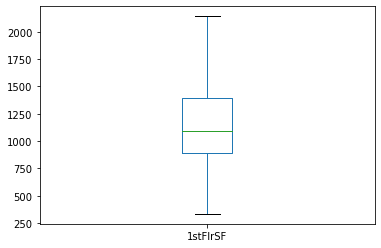

In [1426]:
dt1['1stFlrSF'].plot(kind='box')

In [1427]:
IQR=dt['1stFlrSF'].quantile(0.75)-dt['1stFlrSF'].quantile(0.25)
lower_bridge=dt['1stFlrSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['1stFlrSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

89.25 2139.25


In [1428]:
dt.loc[dt['1stFlrSF']>=2139.25,'1stFlrSF']=2139.25
dt.loc[dt['1stFlrSF']<=89.25,'1stFlrSF']=89.25 

<AxesSubplot:>

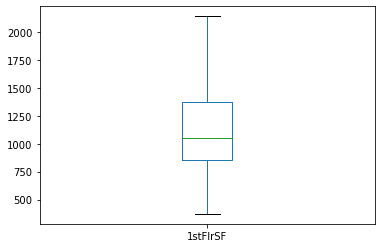

In [1429]:
dt['1stFlrSF'].plot(kind='box')

<AxesSubplot:>

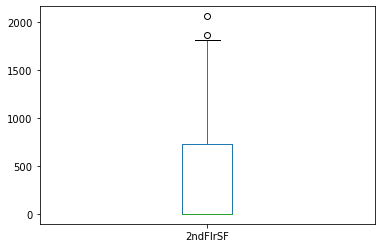

In [1430]:
dt1['2ndFlrSF'].plot(kind='box')

In [1431]:
IQR=dt1['2ndFlrSF'].quantile(0.75)-dt1['2ndFlrSF'].quantile(0.25)
lower_bridge=dt1['2ndFlrSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['2ndFlrSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1093.5 1822.5


In [1432]:
dt1.loc[dt1['2ndFlrSF']>=1822.5,'2ndFlrSF']=1822.5
dt1.loc[dt1['2ndFlrSF']<=-1093.5,'2ndFlrSF']=-1093.5

<AxesSubplot:>

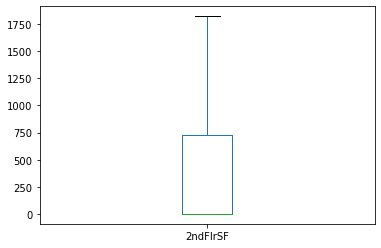

In [1433]:
dt1['2ndFlrSF'].plot(kind='box')

<AxesSubplot:>

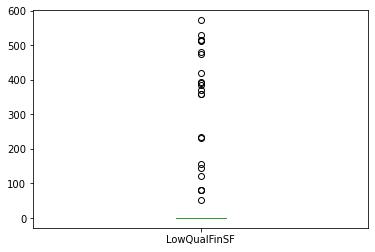

In [1434]:
dt1['LowQualFinSF'].plot(kind='box')

In [1435]:
IQR=dt1['LowQualFinSF'].quantile(0.75)-dt1['LowQualFinSF'].quantile(0.25)
lower_bridge=dt1['LowQualFinSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['LowQualFinSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.0 0.0


<AxesSubplot:>

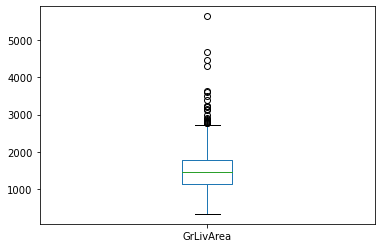

In [1436]:
dt1['GrLivArea'].plot(kind='box')

In [1437]:
IQR=dt1['GrLivArea'].quantile(0.75)-dt1['GrLivArea'].quantile(0.25)
lower_bridge=dt1['GrLivArea'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['GrLivArea'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

165.625 2772.625


In [1438]:
dt1.loc[dt1['GrLivArea']>=2772.625,'GrLivArea']=2772.625
dt1.loc[dt1['GrLivArea']<=165.625,'GrLivArea']=165.625

<AxesSubplot:>

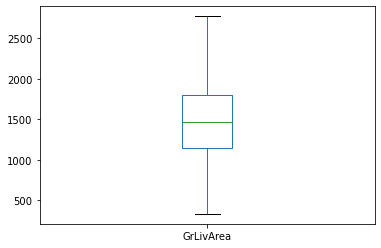

In [1439]:
dt1['GrLivArea'].plot(kind='box')

In [1440]:
IQR=dt['GrLivArea'].quantile(0.75)-dt['GrLivArea'].quantile(0.25)
lower_bridge=dt['GrLivArea'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['GrLivArea'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

73.375 2708.375


In [1441]:
dt.loc[dt['GrLivArea']>=2708.375,'GrLivArea']=2708.375
dt.loc[dt['GrLivArea']<=73.375,'GrLivArea']=73.375

<AxesSubplot:>

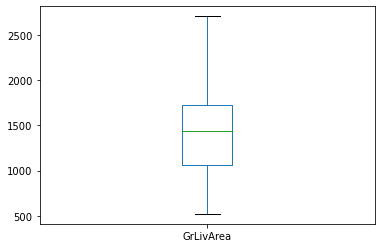

In [1442]:
dt['GrLivArea'].plot(kind='box')

<AxesSubplot:>

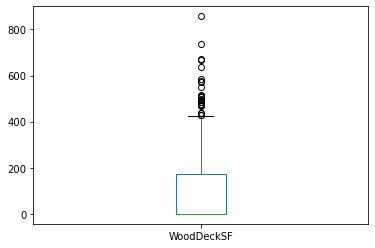

In [1443]:
dt1['WoodDeckSF'].plot(kind='box')

In [1444]:
IQR=dt1['WoodDeckSF'].quantile(0.75)-dt1['WoodDeckSF'].quantile(0.25)
lower_bridge=dt1['WoodDeckSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['WoodDeckSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-256.5 427.5


In [1445]:
dt1.loc[dt1['WoodDeckSF']>=427.5,'WoodDeckSF']=427.5
dt1.loc[dt1['WoodDeckSF']<=-256.5,'WoodDeckSF']=-256.5

<AxesSubplot:>

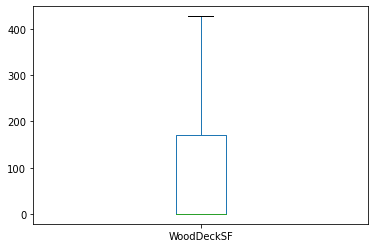

In [1446]:
dt1['WoodDeckSF'].plot(kind='box')

In [1447]:
IQR=dt['WoodDeckSF'].quantile(0.75)-dt['WoodDeckSF'].quantile(0.25)
lower_bridge=dt['WoodDeckSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['WoodDeckSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-223.875 373.125


In [1448]:
dt.loc[dt['WoodDeckSF']>=373.125,'WoodDeckSF']=373.125
dt.loc[dt['WoodDeckSF']<=-223.875,'WoodDeckSF']=-223.875

<AxesSubplot:>

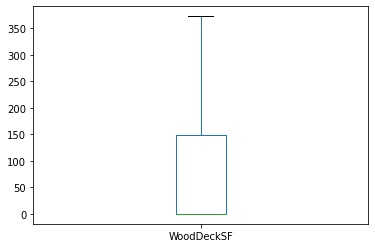

In [1449]:
dt['WoodDeckSF'].plot(kind='box')

<AxesSubplot:>

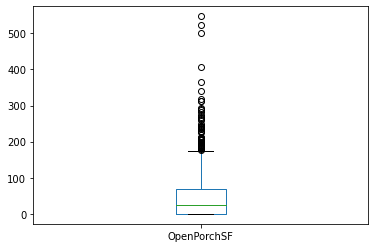

In [1450]:
dt1['OpenPorchSF'].plot(kind='box')

<AxesSubplot:>

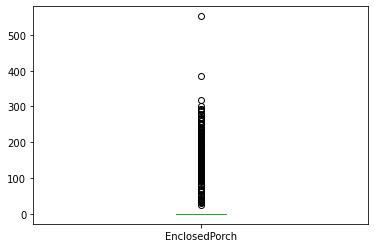

In [1451]:
dt1['EnclosedPorch'].plot(kind='box')

<AxesSubplot:>

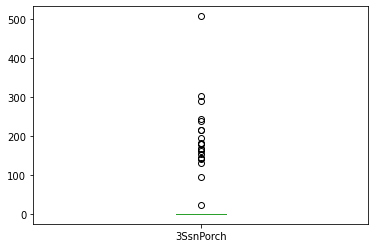

In [1452]:
dt1['3SsnPorch'].plot(kind='box')

<AxesSubplot:>

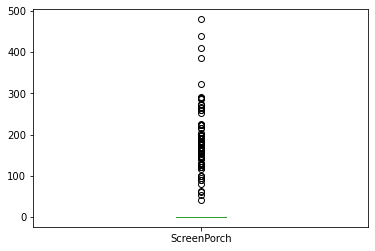

In [1453]:
dt1['ScreenPorch'].plot(kind='box')

<AxesSubplot:>

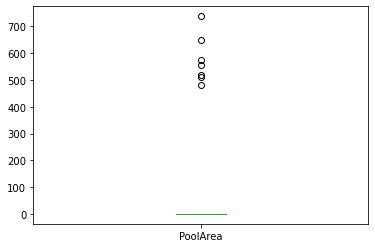

In [1454]:
dt1['PoolArea'].plot(kind='box')

In [1455]:
IQR=dt1['OpenPorchSF'].quantile(0.75)-dt1['OpenPorchSF'].quantile(0.25)
lower_bridge=dt1['OpenPorchSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt1['OpenPorchSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-105.0 175.0


In [1456]:
dt1.loc[dt1['OpenPorchSF']>=175.0,'OpenPorchSF']=175.0
dt1.loc[dt1['OpenPorchSF']<=-105.0,'OpenPorchSF']=-105.0

<AxesSubplot:>

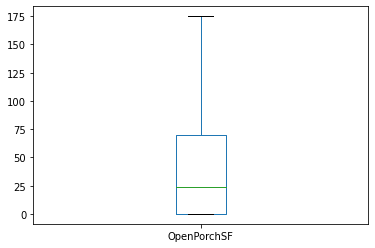

In [1457]:
dt1['OpenPorchSF'].plot(kind='box')

In [1458]:
IQR=dt['OpenPorchSF'].quantile(0.75)-dt['OpenPorchSF'].quantile(0.25)
lower_bridge=dt['OpenPorchSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['OpenPorchSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-99.0 165.0


In [1459]:
dt.loc[dt['OpenPorchSF']>=165.0,'OpenPorchSF']=165.0
dt.loc[dt['OpenPorchSF']<=-99.0,'OpenPorchSF']=-99.0

<AxesSubplot:>

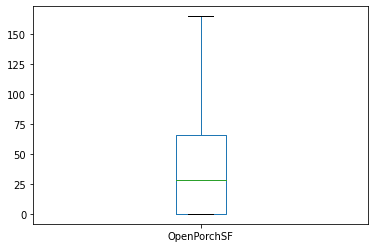

In [1460]:
dt['OpenPorchSF'].plot(kind='box')

In [1461]:
dt1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928.0,Pave,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5.0,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120.0,Unf,0,958,1078.00,GasA,TA,Y,SBrkr,958,0.0,0,958.0,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0.0,175,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865.0,Pave,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6.0,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351.0,Rec,823,1043,2030.25,GasA,Ex,Y,SBrkr,2142,0.0,0,2217.0,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81.0,175,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920.0,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5.0,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862.0,Unf,0,255,1117.00,GasA,Ex,Y,SBrkr,1127,886.0,0,2013.0,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180.0,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751.0,Pave,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6.0,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,400.0,TA,TA,CBlock,Gd,TA,No,BLQ,705.0,Unf,0,1139,1844.00,GasA,Ex,Y,SBrkr,1844,0.0,0,1844.0,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0.0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635.0,Pave,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7.0,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246.0,Unf,0,356,1602.00,GasA,Gd,Y,SBrkr,1602,0.0,0,1602.0,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240.0,0,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,70.0,9819.0,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5.0,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450.0,Unf,0,432,882.00,GasA,TA,Y,SBrkr,900,0.0,0,900.0,0,0,1,0,3,1,TA,5,Typ,0,Gd,Detchd,1970.0,Unf,1,280,TA,TA,Y,0.0,0,0,0,0,0,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777.0,Pave,Reg,Lvl,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5.0,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0,0,60.25,GasA,Ex,Y,SBrkr,1126,0.0,0,1126.0,0,0,2,0,2,1,Gd,5,Typ,0,Gd,Detchd,2002.0,Fin,2,520,TA,TA,N,0.0,96,0,0,0,0,0,5,2009,WD,Normal,108000
1165,196,145,RL,31.5,2280.0,Pave,Reg,Lvl,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6.0,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566.0,Unf,0,289,855.00,GasA,TA,Y,SBrkr,855,601.0,0,1456.0,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87.0,0,0,0,0,0,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500.0,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4.0,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0,649,649.00,GasA,TA,N,SBrkr,649,668.0,0,1317.0,0,0,1,0,3,1,TA,6,Typ,0,Gd,Detchd,1920.0,Unf,1,250,TA,Fa,N,0.0,54,172,0,0,0,0,7,2008,WD,Normal,40000


In [1462]:
dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157.0,Pave,IR1,HLS,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5.0,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249.0,Unf,0,673,1922.0,GasA,Ex,Y,SBrkr,1922.0,0,0,1922.0,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178.0,51,0,0,0,0,0,7,2007,WD,Normal
1,1018,120,RL,65.0,5814.0,Pave,IR1,Lvl,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5.0,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036.0,Unf,0,184,1220.0,GasA,Gd,Y,SBrkr,1360.0,0,0,1360.0,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63.0,0,0,0,0,0,0,8,2009,COD,Abnorml
2,929,20,RL,65.0,11838.0,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5.0,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0,1716,1753.0,GasA,Ex,Y,SBrkr,1788.0,0,0,1788.0,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202.0,151,0,0,0,0,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000.0,Pave,Reg,Bnk,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7.0,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275.0,Unf,0,429,704.0,GasA,Ex,Y,SBrkr,860.0,704,0,1564.0,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0.0,0,0,0,0,0,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598.0,Pave,IR1,Lvl,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5.0,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0,894,894.0,GasA,Ex,Y,SBrkr,894.0,1039,0,1933.0,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100.0,18,0,0,0,0,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206.0,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5.0,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,400.0,TA,TA,PConc,Gd,TA,No,GLQ,33.0,Unf,0,1530,1563.0,GasA,Ex,Y,SBrkr,1563.0,0,0,1563.0,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144.0,99,0,0,0,0,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245.0,Pave,IR2,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5.0,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686.0,Unf,0,304,990.0,GasA,Ex,Y,SBrkr,990.0,0,0,990.0,0,1,1,0,3,1,TA,5,Typ,0,Gd,Detchd,1996.0,Unf,2,672,TA,TA,Y,0.0,0,0,0,0,0,0,2,2008,WD,Normal
289,17,20,RL,65.0,11241.0,Pave,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7.0,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0,426,1004.0,GasA,Ex,Y,SBrkr,1004.0,0,0,1004.0,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0.0,0,0,0,0,0,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000.0,Pave,Reg,Lvl,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7.0,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399.0,Unf,0,605,1004.0,GasA,Ex,Y,SBrkr,1004.0,660,0,1664.0,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0.0,24,36,0,0,0,0,10,2006,WD,Normal


# Encoding for the machine learning model

In [1463]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [1464]:
# Assigning to a variable
le=LabelEncoder()

In [1465]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt1['MSZoning']=le.fit_transform(dt1['MSZoning'])
dt['MSZoning']=le.fit_transform(dt['MSZoning'])
dt1['Condition1']=le.fit_transform(dt1['Condition1'])
dt['Condition1']=le.fit_transform(dt['Condition1'])
dt1['Condition2']=le.fit_transform(dt1['Condition2'])
dt['Condition2']=le.fit_transform(dt['Condition2'])
dt1['Exterior1st']=le.fit_transform(dt1['Exterior1st'])
dt['Exterior1st']=le.fit_transform(dt['Exterior1st'])
dt1['Exterior2nd']=le.fit_transform(dt1['Exterior2nd'])
dt['Exterior2nd']=le.fit_transform(dt['Exterior2nd'])
dt1['Foundation']=le.fit_transform(dt1['Foundation'])
dt['Foundation']=le.fit_transform(dt['Foundation'])
dt1['SaleType']=le.fit_transform(dt1['SaleType'])
dt['SaleType']=le.fit_transform(dt['SaleType'])
dt1['Neighborhood']=le.fit_transform(dt1['Neighborhood'])
dt['Neighborhood']=le.fit_transform(dt['Neighborhood'])

In [1466]:
dt1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.0,4928.0,Pave,IR1,Lvl,Inside,Gtl,13,2,2,TwnhsE,1Story,6,5.0,1976,1976,Gable,CompShg,8,9,None,0.0,TA,TA,1,Gd,TA,No,ALQ,120.0,Unf,0,958,1078.00,GasA,TA,Y,SBrkr,958,0.0,0,958.0,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0.0,175,0,0,0,0,0,2,2007,8,Normal,128000
1,889,20,3,95.0,15865.0,Pave,IR1,Lvl,Inside,Mod,12,2,2,1Fam,1Story,8,6.0,1970,1970,Flat,Tar&Grv,12,13,None,0.0,Gd,Gd,2,TA,Gd,Gd,ALQ,351.0,Rec,823,1043,2030.25,GasA,Ex,Y,SBrkr,2142,0.0,0,2217.0,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81.0,175,0,0,224,0,0,10,2007,8,Normal,268000
2,793,60,3,92.0,9920.0,Pave,IR1,Lvl,CulDSac,Gtl,15,2,2,1Fam,2Story,7,5.0,1996,1997,Gable,CompShg,7,7,None,0.0,Gd,TA,2,Gd,TA,Av,GLQ,862.0,Unf,0,255,1117.00,GasA,Ex,Y,SBrkr,1127,886.0,0,2013.0,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180.0,130,0,0,0,0,0,6,2007,8,Normal,269790
3,110,20,3,105.0,11751.0,Pave,IR1,Lvl,Inside,Gtl,14,2,2,1Fam,1Story,6,6.0,1977,1977,Hip,CompShg,8,9,BrkFace,400.0,TA,TA,1,Gd,TA,No,BLQ,705.0,Unf,0,1139,1844.00,GasA,Ex,Y,SBrkr,1844,0.0,0,1844.0,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0.0,122,0,0,0,0,0,1,2010,0,Normal,190000
4,422,20,3,70.0,16635.0,Pave,IR1,Lvl,FR2,Gtl,14,2,2,1Fam,1Story,6,7.0,1977,2000,Gable,CompShg,4,4,Stone,126.0,Gd,TA,1,Gd,TA,No,ALQ,1246.0,Unf,0,356,1602.00,GasA,Gd,Y,SBrkr,1602,0.0,0,1602.0,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240.0,0,0,0,0,0,0,6,2009,8,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,70.0,9819.0,Pave,IR1,Lvl,Inside,Gtl,19,2,2,1Fam,1Story,5,5.0,1967,1967,Gable,CompShg,7,7,BrkFace,31.0,TA,Gd,1,TA,TA,No,BLQ,450.0,Unf,0,432,882.00,GasA,TA,Y,SBrkr,900,0.0,0,900.0,0,0,1,0,3,1,TA,5,Typ,0,Gd,Detchd,1970.0,Unf,1,280,TA,TA,Y,0.0,0,0,0,0,0,0,2,2010,8,Normal,122000
1164,554,20,3,67.0,8777.0,Pave,Reg,Lvl,Inside,Gtl,7,1,2,1Fam,1Story,4,5.0,1949,2003,Gable,CompShg,11,12,None,0.0,TA,TA,1,TA,TA,No,Unf,0.0,Unf,0,0,60.25,GasA,Ex,Y,SBrkr,1126,0.0,0,1126.0,0,0,2,0,2,1,Gd,5,Typ,0,Gd,Detchd,2002.0,Fin,2,520,TA,TA,N,0.0,96,0,0,0,0,0,5,2009,8,Normal,108000
1165,196,145,3,31.5,2280.0,Pave,Reg,Lvl,FR2,Gtl,13,2,2,Twnhs,2Story,6,6.0,1976,1976,Gable,CompShg,8,2,None,0.0,TA,TA,1,Gd,TA,No,ALQ,566.0,Unf,0,289,855.00,GasA,TA,Y,SBrkr,855,601.0,0,1456.0,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87.0,0,0,0,0,0,0,7,2009,8,Normal,148500
1166,31,70,0,50.0,8500.0,Pave,Reg,Lvl,Inside,Gtl,9,1,2,1Fam,2Story,4,4.0,1920,1950,Gambrel,CompShg,3,3,None,0.0,TA,Fa,0,TA,TA,No,Unf,0.0,Unf,0,649,649.00,GasA,TA,N,SBrkr,649,668.0,0,1317.0,0,0,1,0,3,1,TA,6,Typ,0,Gd,Detchd,1920.0,Unf,1,250,TA,Fa,N,0.0,54,172,0,0,0,0,7,2008,8,Normal,40000


In [1467]:
dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,86.0,14157.0,Pave,IR1,HLS,Corner,Gtl,21,2,0,1Fam,1Story,9,5.0,2005,2006,Hip,CompShg,9,11,Stone,200.0,Gd,TA,2,Ex,TA,Gd,GLQ,1249.0,Unf,0,673,1922.0,GasA,Ex,Y,SBrkr,1922.0,0,0,1922.0,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178.0,51,0,0,0,0,0,7,2007,5,Normal
1,1018,120,2,65.0,5814.0,Pave,IR1,Lvl,CulDSac,Gtl,21,2,0,TwnhsE,1Story,8,5.0,1984,1984,Gable,CompShg,5,5,None,0.0,Gd,TA,1,Gd,TA,Av,GLQ,1036.0,Unf,0,184,1220.0,GasA,Gd,Y,SBrkr,1360.0,0,0,1360.0,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63.0,0,0,0,0,0,0,8,2009,0,Abnorml
2,929,20,2,65.0,11838.0,Pave,Reg,Lvl,Inside,Gtl,4,2,0,1Fam,1Story,8,5.0,2001,2001,Hip,CompShg,9,11,None,0.0,Gd,TA,2,Gd,TA,Av,Unf,0.0,Unf,0,1716,1753.0,GasA,Ex,Y,SBrkr,1788.0,0,0,1788.0,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202.0,151,0,0,0,0,0,6,2009,5,Normal
3,1148,70,2,75.0,12000.0,Pave,Reg,Bnk,Inside,Gtl,5,2,0,1Fam,2Story,7,7.0,1941,1950,Gable,CompShg,6,7,None,0.0,TA,TA,1,TA,TA,No,Rec,275.0,Unf,0,429,704.0,GasA,Ex,Y,SBrkr,860.0,704,0,1564.0,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0.0,0,0,0,0,0,0,7,2009,5,Normal
4,1227,60,2,86.0,14598.0,Pave,IR1,Lvl,CulDSac,Gtl,20,1,0,1Fam,2Story,6,5.0,2007,2007,Gable,CompShg,9,11,Stone,74.0,Gd,TA,2,Gd,TA,Mn,Unf,0.0,Unf,0,894,894.0,GasA,Ex,Y,SBrkr,894.0,1039,0,1933.0,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100.0,18,0,0,0,0,0,1,2008,5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,2,78.0,10206.0,Pave,Reg,Lvl,Inside,Gtl,20,2,0,1Fam,1Story,8,5.0,2007,2007,Gable,CompShg,9,11,Stone,400.0,TA,TA,2,Gd,TA,No,GLQ,33.0,Unf,0,1530,1563.0,GasA,Ex,Y,SBrkr,1563.0,0,0,1563.0,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144.0,99,0,0,0,0,0,10,2008,5,Normal
288,1048,20,2,57.0,9245.0,Pave,IR2,Lvl,Inside,Gtl,4,2,0,1Fam,1Story,5,5.0,1994,1995,Gable,CompShg,9,11,None,0.0,TA,TA,2,Gd,TA,No,GLQ,686.0,Unf,0,304,990.0,GasA,Ex,Y,SBrkr,990.0,0,0,990.0,0,1,1,0,3,1,TA,5,Typ,0,Gd,Detchd,1996.0,Unf,2,672,TA,TA,Y,0.0,0,0,0,0,0,0,2,2008,5,Normal
289,17,20,2,65.0,11241.0,Pave,IR1,Lvl,CulDSac,Gtl,11,2,0,1Fam,1Story,6,7.0,1970,1970,Gable,CompShg,10,12,BrkFace,180.0,TA,TA,1,TA,TA,No,ALQ,578.0,Unf,0,426,1004.0,GasA,Ex,Y,SBrkr,1004.0,0,0,1004.0,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0.0,0,0,0,0,0,700,3,2010,5,Normal
290,523,50,3,50.0,5000.0,Pave,Reg,Lvl,Corner,Gtl,2,1,0,1Fam,1.5Fin,6,7.0,1947,1950,Gable,CompShg,4,4,None,0.0,TA,Gd,1,TA,TA,No,ALQ,399.0,Unf,0,605,1004.0,GasA,Ex,Y,SBrkr,1004.0,660,0,1664.0,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0.0,24,36,0,0,0,0,10,2006,5,Normal


In [1468]:
dt1['Street']=dt1['Street'].map({'Grvl':1, 'Pave':0})
dt['Street']=dt['Street'].map({'Grvl':1, 'Pave':0})

In [1469]:
dt1['LotShape']=dt1['LotShape'].map({'IR3':0, 'IR2':1, 'IR1':2,'Reg':3})
dt['LotShape']=dt['LotShape'].map({'IR3':0, 'IR2':1, 'IR1':2,'Reg':3})

In [1470]:
dt1['LandContour']=dt1['LandContour'].map({'Low':0, 'HLS':1, 'Bnk':2,'Lvl':3})
dt['LandContour']=dt['LandContour'].map({'Low':0, 'HLS':1, 'Bnk':2,'Lvl':3})

In [1471]:
dt1['LotConfig']=dt1['LotConfig'].map({'FR3':0, 'FR2':1, 'CulDSac':2,'Corner':3,'Inside':4})
dt['LotConfig']=dt['LotConfig'].map({'FR3':0, 'FR2':1, 'CulDSac':2,'Corner':3,'Inside':4})

In [1472]:
dt1['LandSlope']=dt1['LandSlope'].map({'Sev':0, 'Mod':1,'Gtl':2})
dt['LandSlope']=dt['LandSlope'].map({'Sev':0, 'Mod':1,'Gtl':2})
dt1['BldgType']=dt1['BldgType'].map({'1Fam':0, '2fmCon':1,'Duplex':2,'TwnhsE':3,'Twnhs':4})
dt['BldgType']=dt['BldgType'].map({'1Fam':0, '2fmCon':1,'Duplex':2,'TwnhsE':3,'Twnhs':4})

In [1473]:
dt1['HouseStyle']=dt1['HouseStyle'].map({'1Story':0, '1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7})
dt['HouseStyle']=dt['HouseStyle'].map({'1Story':0, '1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7})
dt1['RoofStyle']=dt1['RoofStyle'].map({'Shed':0, 'Mansard':1,'Hip':2,'Gambrel':3,'Gable':4,'Flat':5})
dt['RoofStyle']=dt['RoofStyle'].map({'Shed':0, 'Mansard':1,'Hip':2,'Gambrel':3,'Gable':4,'Flat':5})

dt1['RoofMatl']=dt1['RoofMatl'].map({'WdShngl':0, 'WdShake':1,'Tar&Grv':2,'Roll':3,'Metal':4,'Membran':5,'CompShg':6,'ClyTile':7})
dt['RoofMatl']=dt['RoofMatl'].map({'WdShngl':0, 'WdShake':1,'Tar&Grv':2,'Roll':3,'Metal':4,'Membran':5,'CompShg':6,'ClyTile':7})

dt1['MasVnrType']=dt1['MasVnrType'].map({'None':0, 'BrkCmn':1, 'BrkFace':2,'CBlock':3,'Stone':4})
dt['MasVnrType']=dt['MasVnrType'].map({'None':0, 'BrkCmn':1, 'BrkFace':2,'CBlock':3,'Stone':4})

dt1['ExterQual']=dt1['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
dt['ExterQual']=dt['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})

In [1477]:
dt1['ExterCond']=dt1['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
dt['ExterCond']=dt['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
dt1['BsmtQual']=dt1['BsmtQual'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
dt['BsmtQual']=dt['BsmtQual'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
dt1['BsmtCond']=dt1['BsmtCond'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
dt['BsmtCond']=dt['BsmtCond'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})

dt1['BsmtExposure']=dt1['BsmtExposure'].map({'NA':0, 'No':1, 'Mn':2,'Av':3,'Gd':4})
dt['BsmtExposure']=dt['BsmtExposure'].map({'NA':0, 'No':1, 'Mn':2,'Av':3,'Gd':4})

dt1['BsmtFinType1']=dt1['BsmtFinType1'].map({'LwQ':0,'Unf':1,'Rec':2,'BLQ':3,'ALQ':4,'GLQ':5})
dt['BsmtFinType1']=dt['BsmtFinType1'].map({'LwQ':0,'Unf':1,'Rec':2,'BLQ':3,'ALQ':4,'GLQ':5})

dt1['BsmtFinType2']=dt1['BsmtFinType2'].map({'Unf':0,'LwQ':1,'Rec':2,'BLQ':3,'ALQ':4,'GLQ':5})
dt['BsmtFinType2']=dt['BsmtFinType2'].map({'Unf':0,'LwQ':1, 'Rec':2,'BLQ':3,'ALQ':4,'GLQ':5})

dt1['Heating']=dt1['Heating'].map({'Wall':0, 'OthW':1, 'Grav':2,'GasW':3,'GasA':4,'Floor':5})
dt['Heating']=dt['Heating'].map({'Wall':0, 'OthW':1, 'Grav':2,'GasW':3,'GasA':4,'Floor':5})

In [1478]:
dt1['HeatingQC']=dt1['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
dt['HeatingQC']=dt['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})

dt1['CentralAir']=dt1['CentralAir'].map({'N':0, 'Y':1})
dt['CentralAir']=dt['CentralAir'].map({'N':0, 'Y':1})

dt1['Electrical']=dt1['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':2,'FuseA':3,'SBrkr':4})
dt['Electrical']=dt['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':2,'FuseA':3,'SBrkr':4})

dt1['KitchenQual']=dt1['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
dt['KitchenQual']=dt['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})

In [1479]:
dt1['Functional']=dt1['Functional'].map({'Sal':0,'Sev':1, 'Maj2':2, 'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})
dt['Functional']=dt['Functional'].map({'Sal':0,'Sev':1, 'Maj2':2, 'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})

dt1['FireplaceQu']=dt1['FireplaceQu'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3,'Gd':3,'Ex':4})
dt['FireplaceQu']=dt['FireplaceQu'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3,'Gd':3,'Ex':4})
dt1['GarageQual']=dt1['GarageQual'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3,'Gd':3,'Ex':4})
dt['GarageQual']=dt['GarageQual'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3,'Gd':3,'Ex':4})
dt1['GarageCond']=dt1['GarageCond'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3,'Gd':3,'Ex':4})
dt['GarageCond']=dt['GarageCond'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3,'Gd':3,'Ex':4})

dt1['GarageType']=dt1['GarageType'].map({'NA':0,'Detchd':1, 'CarPort':2, 'BuiltIn':3,'Basment':4,'Attchd':5,'2Types':6})
dt['GarageType']=dt['GarageType'].map({'NA':0,'Detchd':1, 'CarPort':2, 'BuiltIn':3,'Basment':4,'Attchd':5,'2Types':6})

dt1['GarageFinish']=dt1['GarageFinish'].map({'NA':0, 'Unf':1,'RFn':2,'Fin':3})
dt['GarageFinish']=dt['GarageFinish'].map({'NA':0, 'Unf':1,'RFn':2,'Fin':3})

dt1['PavedDrive']=dt1['PavedDrive'].map({'N':0, 'P':1,'Y':3})
dt['PavedDrive']=dt['PavedDrive'].map({'N':0, 'P':1,'Y':3})

In [1480]:
dt1['SaleCondition']=dt1['SaleCondition'].map({'Partial':0, 'Family':1,'Alloca':2,'AdjLand':3,'Abnorml':4,'Normal':5})
dt['SaleCondition']=dt['SaleCondition'].map({'Partial':0, 'Family':1,'Alloca':2,'AdjLand':3,'Abnorml':4,'Normal':5})

In [1481]:
dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,86.0,14157.0,0,2,1,3,2,21,2,0,0,0,9,5.0,2005,2006,2,6,9,11,4,200.0,3,2,2,4,2,4,5,1249.0,0,0,673,1922.0,4,4,1,4,1922.0,0,0,1922.0,1,0,2,0,3,1,3,8,7,1,3,5,2005.0,3,3,676,3,3,3,178.0,51,0,0,0,0,0,7,2007,5,5
1,1018,120,2,65.0,5814.0,0,2,3,2,2,21,2,0,3,0,8,5.0,1984,1984,4,6,5,5,0,0.0,3,2,1,3,2,3,5,1036.0,0,0,184,1220.0,4,3,1,4,1360.0,0,0,1360.0,1,0,1,0,1,1,3,4,7,1,4,5,1984.0,2,2,565,3,3,3,63.0,0,0,0,0,0,0,8,2009,0,4
2,929,20,2,65.0,11838.0,0,3,3,4,2,4,2,0,0,0,8,5.0,2001,2001,2,6,9,11,0,0.0,3,2,2,3,2,3,1,0.0,0,0,1716,1753.0,4,4,1,4,1788.0,0,0,1788.0,0,0,2,0,3,1,4,7,7,1,3,5,2001.0,2,2,522,3,3,3,202.0,151,0,0,0,0,0,6,2009,5,5
3,1148,70,2,75.0,12000.0,0,3,2,4,2,5,2,0,0,3,7,7.0,1941,1950,4,6,6,7,0,0.0,2,2,1,2,2,1,2,275.0,0,0,429,704.0,4,4,1,4,860.0,704,0,1564.0,0,0,1,1,3,1,1,7,7,1,3,5,1941.0,1,1,234,3,3,3,0.0,0,0,0,0,0,0,7,2009,5,5
4,1227,60,2,86.0,14598.0,0,2,3,2,2,20,1,0,0,3,6,5.0,2007,2007,4,6,9,11,4,74.0,3,2,2,3,2,2,1,0.0,0,0,894,894.0,4,4,1,4,894.0,1039,0,1933.0,0,0,2,1,4,1,3,9,7,1,3,3,2007.0,3,3,668,3,3,3,100.0,18,0,0,0,0,0,1,2008,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,2,78.0,10206.0,0,3,3,4,2,20,2,0,0,0,8,5.0,2007,2007,4,6,9,11,4,400.0,2,2,2,3,2,1,5,33.0,0,0,1530,1563.0,4,4,1,4,1563.0,0,0,1563.0,0,0,2,0,3,1,3,6,7,1,3,5,2007.0,2,3,758,3,3,3,144.0,99,0,0,0,0,0,10,2008,5,5
288,1048,20,2,57.0,9245.0,0,1,3,4,2,4,2,0,0,0,5,5.0,1994,1995,4,6,9,11,0,0.0,2,2,2,3,2,1,5,686.0,0,0,304,990.0,4,4,1,4,990.0,0,0,990.0,0,1,1,0,3,1,2,5,7,0,3,1,1996.0,1,2,672,3,3,3,0.0,0,0,0,0,0,0,2,2008,5,5
289,17,20,2,65.0,11241.0,0,2,3,2,2,11,2,0,0,0,6,7.0,1970,1970,4,6,10,12,2,180.0,2,2,1,2,2,1,4,578.0,0,0,426,1004.0,4,4,1,4,1004.0,0,0,1004.0,1,0,1,0,2,1,2,5,7,1,3,5,1970.0,3,2,480,3,3,3,0.0,0,0,0,0,0,700,3,2010,5,5
290,523,50,3,50.0,5000.0,0,3,3,3,2,2,1,0,0,1,6,7.0,1947,1950,4,6,4,4,0,0.0,2,3,1,2,2,1,4,399.0,0,0,605,1004.0,4,4,1,4,1004.0,660,0,1664.0,0,0,2,0,3,1,2,7,7,2,3,1,1950.0,1,2,420,3,3,3,0.0,24,36,0,0,0,0,10,2006,5,5


In [1482]:
dt1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.0,4928.0,0,2,3,4,2,13,2,2,3,0,6,5.0,1976,1976,4,6,8,9,0,0.0,2,2,1,3,2,1,4,120.0,0,0,958,1078.00,4,2,1,4,958,0.0,0,958.0,0,0,2,0,2,1,2,5,7,1,3,5,1977.0,2,2,440,3,3,3,0.0,175,0,0,0,0,0,2,2007,8,5,128000
1,889,20,3,95.0,15865.0,0,2,3,4,1,12,2,2,0,0,8,6.0,1970,1970,5,2,12,13,0,0.0,3,3,2,2,3,4,4,351.0,2,823,1043,2030.25,4,4,1,4,2142,0.0,0,2217.0,1,0,2,0,4,1,3,8,7,1,3,5,1970.0,1,2,621,3,3,3,81.0,175,0,0,224,0,0,10,2007,8,5,268000
2,793,60,3,92.0,9920.0,0,2,3,2,2,15,2,2,0,3,7,5.0,1996,1997,4,6,7,7,0,0.0,3,2,2,3,2,3,5,862.0,0,0,255,1117.00,4,4,1,4,1127,886.0,0,2013.0,1,0,2,1,3,1,2,8,7,1,3,5,1997.0,1,2,455,3,3,3,180.0,130,0,0,0,0,0,6,2007,8,5,269790
3,110,20,3,105.0,11751.0,0,2,3,4,2,14,2,2,0,0,6,6.0,1977,1977,2,6,8,9,2,400.0,2,2,1,3,2,1,3,705.0,0,0,1139,1844.00,4,4,1,4,1844,0.0,0,1844.0,0,0,2,0,3,1,2,7,7,1,3,5,1977.0,2,2,546,3,3,3,0.0,122,0,0,0,0,0,1,2010,0,5,190000
4,422,20,3,70.0,16635.0,0,2,3,1,2,14,2,2,0,0,6,7.0,1977,2000,4,6,4,4,4,126.0,3,2,1,3,2,1,4,1246.0,0,0,356,1602.00,4,3,1,4,1602,0.0,0,1602.0,0,1,2,0,3,1,3,8,7,1,3,5,1977.0,3,2,529,3,3,3,240.0,0,0,0,0,0,0,6,2009,8,5,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,70.0,9819.0,0,2,3,4,2,19,2,2,0,0,5,5.0,1967,1967,4,6,7,7,2,31.0,2,3,1,2,2,1,3,450.0,0,0,432,882.00,4,2,1,4,900,0.0,0,900.0,0,0,1,0,3,1,2,5,7,0,3,1,1970.0,1,1,280,3,3,3,0.0,0,0,0,0,0,0,2,2010,8,5,122000
1164,554,20,3,67.0,8777.0,0,3,3,4,2,7,1,2,0,0,4,5.0,1949,2003,4,6,11,12,0,0.0,2,2,1,2,2,1,1,0.0,0,0,0,60.25,4,4,1,4,1126,0.0,0,1126.0,0,0,2,0,2,1,3,5,7,0,3,1,2002.0,3,2,520,3,3,0,0.0,96,0,0,0,0,0,5,2009,8,5,108000
1165,196,145,3,31.5,2280.0,0,3,3,1,2,13,2,2,4,3,6,6.0,1976,1976,4,6,8,2,0,0.0,2,2,1,3,2,1,4,566.0,0,0,289,855.00,4,2,1,4,855,601.0,0,1456.0,0,0,2,1,3,1,2,7,7,1,3,5,1976.0,1,2,440,3,3,3,87.0,0,0,0,0,0,0,7,2009,8,5,148500
1166,31,70,0,50.0,8500.0,0,3,3,4,2,9,1,2,0,3,4,4.0,1920,1950,3,6,3,3,0,0.0,2,1,0,2,2,1,1,0.0,0,0,649,649.00,4,2,0,4,649,668.0,0,1317.0,0,0,1,0,3,1,2,6,7,0,3,1,1920.0,1,1,250,3,2,0,0.0,54,172,0,0,0,0,7,2008,8,5,40000


In [1483]:
dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,86.0,14157.0,0,2,1,3,2,21,2,0,0,0,9,5.0,2005,2006,2,6,9,11,4,200.0,3,2,2,4,2,4,5,1249.0,0,0,673,1922.0,4,4,1,4,1922.0,0,0,1922.0,1,0,2,0,3,1,3,8,7,1,3,5,2005.0,3,3,676,3,3,3,178.0,51,0,0,0,0,0,7,2007,5,5
1,1018,120,2,65.0,5814.0,0,2,3,2,2,21,2,0,3,0,8,5.0,1984,1984,4,6,5,5,0,0.0,3,2,1,3,2,3,5,1036.0,0,0,184,1220.0,4,3,1,4,1360.0,0,0,1360.0,1,0,1,0,1,1,3,4,7,1,4,5,1984.0,2,2,565,3,3,3,63.0,0,0,0,0,0,0,8,2009,0,4
2,929,20,2,65.0,11838.0,0,3,3,4,2,4,2,0,0,0,8,5.0,2001,2001,2,6,9,11,0,0.0,3,2,2,3,2,3,1,0.0,0,0,1716,1753.0,4,4,1,4,1788.0,0,0,1788.0,0,0,2,0,3,1,4,7,7,1,3,5,2001.0,2,2,522,3,3,3,202.0,151,0,0,0,0,0,6,2009,5,5
3,1148,70,2,75.0,12000.0,0,3,2,4,2,5,2,0,0,3,7,7.0,1941,1950,4,6,6,7,0,0.0,2,2,1,2,2,1,2,275.0,0,0,429,704.0,4,4,1,4,860.0,704,0,1564.0,0,0,1,1,3,1,1,7,7,1,3,5,1941.0,1,1,234,3,3,3,0.0,0,0,0,0,0,0,7,2009,5,5
4,1227,60,2,86.0,14598.0,0,2,3,2,2,20,1,0,0,3,6,5.0,2007,2007,4,6,9,11,4,74.0,3,2,2,3,2,2,1,0.0,0,0,894,894.0,4,4,1,4,894.0,1039,0,1933.0,0,0,2,1,4,1,3,9,7,1,3,3,2007.0,3,3,668,3,3,3,100.0,18,0,0,0,0,0,1,2008,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,2,78.0,10206.0,0,3,3,4,2,20,2,0,0,0,8,5.0,2007,2007,4,6,9,11,4,400.0,2,2,2,3,2,1,5,33.0,0,0,1530,1563.0,4,4,1,4,1563.0,0,0,1563.0,0,0,2,0,3,1,3,6,7,1,3,5,2007.0,2,3,758,3,3,3,144.0,99,0,0,0,0,0,10,2008,5,5
288,1048,20,2,57.0,9245.0,0,1,3,4,2,4,2,0,0,0,5,5.0,1994,1995,4,6,9,11,0,0.0,2,2,2,3,2,1,5,686.0,0,0,304,990.0,4,4,1,4,990.0,0,0,990.0,0,1,1,0,3,1,2,5,7,0,3,1,1996.0,1,2,672,3,3,3,0.0,0,0,0,0,0,0,2,2008,5,5
289,17,20,2,65.0,11241.0,0,2,3,2,2,11,2,0,0,0,6,7.0,1970,1970,4,6,10,12,2,180.0,2,2,1,2,2,1,4,578.0,0,0,426,1004.0,4,4,1,4,1004.0,0,0,1004.0,1,0,1,0,2,1,2,5,7,1,3,5,1970.0,3,2,480,3,3,3,0.0,0,0,0,0,0,700,3,2010,5,5
290,523,50,3,50.0,5000.0,0,3,3,3,2,2,1,0,0,1,6,7.0,1947,1950,4,6,4,4,0,0.0,2,3,1,2,2,1,4,399.0,0,0,605,1004.0,4,4,1,4,1004.0,660,0,1664.0,0,0,2,0,3,1,2,7,7,2,3,1,1950.0,1,2,420,3,3,3,0.0,24,36,0,0,0,0,10,2006,5,5


In [1484]:
# Assignment of X and y
X=dt1.drop(['SalePrice'], axis=1)
y=dt1.SalePrice

# Performing Principal component analysis

In [1485]:
# Importing PCA components
from sklearn.decomposition import PCA

In [1486]:
for col in dt1:
    print ('This column', col ,'has', dt1[col].isna().sum(),'NAN elements')
    print ('*'*100)
print('-+-'*166)
for col in dt:
    print ('This column', col ,'has', dt[col].isna().sum(),'NAN elements')
    print ('*'*100)

This column Id has 0 NAN elements
****************************************************************************************************
This column MSSubClass has 0 NAN elements
****************************************************************************************************
This column MSZoning has 0 NAN elements
****************************************************************************************************
This column LotFrontage has 0 NAN elements
****************************************************************************************************
This column LotArea has 0 NAN elements
****************************************************************************************************
This column Street has 0 NAN elements
****************************************************************************************************
This column LotShape has 0 NAN elements
****************************************************************************************************
This column LandC

In [1498]:
pca=PCA()
pca.fit_transform(X)

array([[ 4.77617845e+03, -5.09514349e+01, -1.81266460e+02, ...,
        -1.08491888e-01, -5.82777020e-03, -1.59531860e-02],
       [-6.29504489e+03, -6.17242000e+02, -7.65612143e+02, ...,
        -4.00476896e-02, -4.40932641e-02, -7.75073603e-03],
       [-2.93758472e+02, -3.29799109e+02,  9.62444773e+01, ...,
        -8.25470541e-02,  2.43994313e-02,  1.74314021e-02],
       ...,
       [ 7.38126186e+03, -3.36495031e+02,  2.55659896e+00, ...,
        -2.16655029e-01,  1.08522441e-02, -7.45672391e-03],
       [ 1.23033571e+03,  6.73024546e+01,  7.51665615e+02, ...,
        -1.46809416e-01,  5.72961408e-01, -4.13069894e-02],
       [ 1.82936763e+03,  1.36502791e+01,  3.83740559e+02, ...,
         1.76578607e-02, -3.22788653e-03,  1.88628331e-02]])

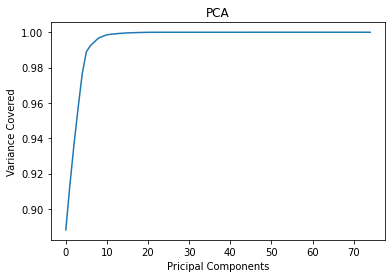

In [1499]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [1500]:
pca=PCA(n_components=9)
new_pcomp=pca.fit_transform(X)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

In [1501]:
prin_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,4776.178453,-50.951435,-181.266460,10.322312,588.189613,-616.994122,-144.861376,68.963249,13.860168
1,-6295.044894,-617.242000,-765.612143,149.629906,558.515296,189.547035,652.132779,400.424988,-458.885806
2,-293.758472,-329.799109,96.244477,52.805685,-799.450226,102.246607,-100.790810,-72.850018,-126.627753
3,-2163.071867,-619.709705,-903.728214,252.093372,376.438051,-604.243178,-18.151019,-119.329699,-37.969765
4,-6994.286106,476.743970,-759.865260,23.519096,-213.436427,-323.289489,-147.360280,-108.945399,-77.370230
...,...,...,...,...,...,...,...,...,...
1163,-78.073322,726.003910,-14.638194,-191.302626,230.621266,-479.606829,-136.698768,-65.767156,-55.263431
1164,979.244101,808.781213,472.116075,-325.466606,32.835606,-184.310692,593.533769,-114.954073,521.366585
1165,7381.261859,-336.495031,2.556599,145.239292,-588.505083,-502.617450,-43.560730,24.232578,3.273666
1166,1230.335710,67.302455,751.665615,-266.984213,135.740932,-702.866871,-127.190334,-47.483368,-110.237900


In [1494]:
X1=dt
pca=PCA()
pca.fit_transform(X)

array([[ 4.77617845e+03, -5.09514349e+01, -1.81266460e+02, ...,
        -1.08491888e-01, -5.82777020e-03, -1.59531860e-02],
       [-6.29504489e+03, -6.17242000e+02, -7.65612143e+02, ...,
        -4.00476896e-02, -4.40932641e-02, -7.75073603e-03],
       [-2.93758472e+02, -3.29799109e+02,  9.62444773e+01, ...,
        -8.25470541e-02,  2.43994313e-02,  1.74314021e-02],
       ...,
       [ 7.38126186e+03, -3.36495031e+02,  2.55659896e+00, ...,
        -2.16655029e-01,  1.08522441e-02, -7.45672391e-03],
       [ 1.23033571e+03,  6.73024546e+01,  7.51665615e+02, ...,
        -1.46809416e-01,  5.72961408e-01, -4.13069894e-02],
       [ 1.82936763e+03,  1.36502791e+01,  3.83740559e+02, ...,
         1.76578607e-02, -3.22788653e-03,  1.88628331e-02]])

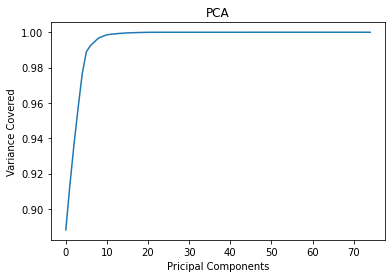

In [1495]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [1496]:
pca=PCA(n_components=9)
new_pcomp=pca.fit_transform(X)
prin_comp1=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

In [1497]:
prin_comp1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,4776.178453,-50.951435,-181.266460,10.322312,588.189613,-616.994122,-144.861373,68.963209,13.860131
1,-6295.044894,-617.242000,-765.612143,149.629906,558.515296,189.547035,652.132782,400.424814,-458.885904
2,-293.758472,-329.799109,96.244477,52.805685,-799.450226,102.246607,-100.790811,-72.849988,-126.627732
3,-2163.071867,-619.709705,-903.728214,252.093372,376.438051,-604.243178,-18.151018,-119.329660,-37.969750
4,-6994.286106,476.743970,-759.865260,23.519096,-213.436427,-323.289489,-147.360280,-108.945370,-77.370215
...,...,...,...,...,...,...,...,...,...
1163,-78.073322,726.003910,-14.638194,-191.302626,230.621266,-479.606829,-136.698768,-65.767140,-55.263420
1164,979.244101,808.781213,472.116075,-325.466606,32.835606,-184.310692,593.533769,-114.954079,521.366589
1165,7381.261859,-336.495031,2.556599,145.239292,-588.505083,-502.617450,-43.560729,24.232574,3.273655
1166,1230.335710,67.302455,751.665615,-266.984213,135.740932,-702.866871,-127.190332,-47.483356,-110.237902


In [1502]:
# Applying machine learning models
# Importing machine learning libraries
# The problem is related regression the regression models are used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [1503]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.5996975825905732
At random state, 1, the testing accuracy is :0.7189374572847607


At random state, 2, the training accuracy is :0.5975731350126993
At random state, 2, the testing accuracy is :0.7242651950974359


At random state, 3, the training accuracy is :0.5997355038426495
At random state, 3, the testing accuracy is :0.6978360241174185


At random state, 4, the training accuracy is :0.5984500078089378
At random state, 4, the testing accuracy is :0.7204126319378052


At random state, 5, the training accuracy is :0.6331701122263631
At random state, 5, the testing accuracy is :0.65880128790751


At random state, 6, the training accuracy is :0.5972130385458836
At random state, 6, the testing accuracy is :0.728053480997424


At random state, 7, the training accuracy is :0.5916283881274096
At random state, 7, the testing accuracy is :0.7201659987377036


At random state, 8, the training accuracy is :0.5978535622554957
At random state, 8, t

In [1504]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.9389664538173904
At random state, 1, the testing accuracy is :0.7523606888379195


At random state, 2, the training accuracy is :0.9465046279249646
At random state, 2, the testing accuracy is :0.6611046943799719


At random state, 3, the training accuracy is :0.9386216729204379
At random state, 3, the testing accuracy is :0.7448323124373235


At random state, 4, the training accuracy is :0.9411818835949277
At random state, 4, the testing accuracy is :0.7347802990694121


At random state, 5, the training accuracy is :0.9515686480915782
At random state, 5, the testing accuracy is :0.6080234273795312


At random state, 6, the training accuracy is :0.9428666156552923
At random state, 6, the testing accuracy is :0.7712407644761974


At random state, 7, the training accuracy is :0.9460092544851936
At random state, 7, the testing accuracy is :0.6898690884784613


At random state, 8, the training accuracy is :0.945606712258894
At random state, 8,

In [1505]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    de=DecisionTreeRegressor()
    de.fit(x_train, y_train)
    predtrain=de.predict(x_train)
    predtest=de.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :1.0
At random state, 1, the testing accuracy is :0.4897283778950011


At random state 2, the training accuracy is :1.0
At random state, 2, the testing accuracy is :0.3440821631916382


At random state 3, the training accuracy is :1.0
At random state, 3, the testing accuracy is :0.5150347958696919


At random state 4, the training accuracy is :1.0
At random state, 4, the testing accuracy is :0.5627443427536739


At random state 5, the training accuracy is :1.0
At random state, 5, the testing accuracy is :0.3041731819982363


At random state 6, the training accuracy is :1.0
At random state, 6, the testing accuracy is :0.3812024075545084


At random state 7, the training accuracy is :1.0
At random state, 7, the testing accuracy is :0.35808941773586334


At random state 8, the training accuracy is :1.0
At random state, 8, the testing accuracy is :0.448500550376829


At random state 9, the training accuracy is :1.0
At random state, 9, the testing

In [1506]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9995531804485493
At random state, 1, the testing accuracy is :0.7445870345382739


At random state 2, the training accuracy is :0.9995020413093885
At random state, 2, the testing accuracy is :0.710136023982831


At random state 3, the training accuracy is :0.9994775918146773
At random state, 3, the testing accuracy is :0.6248927941651737


At random state 4, the training accuracy is :0.9994746744661802
At random state, 4, the testing accuracy is :0.7065183722484114


At random state 5, the training accuracy is :0.9992577377169317
At random state, 5, the testing accuracy is :0.5814188727889695


At random state 6, the training accuracy is :0.9996015450587469
At random state, 6, the testing accuracy is :0.6877514636355262


At random state 7, the training accuracy is :0.9995609183091676
At random state, 7, the testing accuracy is :0.7625345156138758


At random state 8, the training accuracy is :0.9995128779551572
At random state, 8, the tes

In [1507]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    predtrain=ad.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.6088378307308194
At random state, 1, the testing accuracy is :0.6180221781241355


At random state, 2, the training accuracy is :0.49187385557588426
At random state, 2, the testing accuracy is :0.5082574346121844


At random state, 3, the training accuracy is :0.6075652392385724
At random state, 3, the testing accuracy is :0.6472689709102408


At random state, 4, the training accuracy is :0.5297386598478514
At random state, 4, the testing accuracy is :0.6247832430446097


At random state, 5, the training accuracy is :0.5319820669976743
At random state, 5, the testing accuracy is :0.4918519865556922


At random state, 6, the training accuracy is :0.5969578610694741
At random state, 6, the testing accuracy is :0.658299053242362


At random state, 7, the training accuracy is :0.4938044107247459
At random state, 7, the testing accuracy is :0.556372580540279


At random state, 8, the training accuracy is :0.5735636714709789
At random state, 8,

In [1508]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.5878771678487028
At random state, 1, the testing accuracy is :0.6650526403585688


At random state 2, the training accuracy is :0.6041723391483879
At random state, 2, the testing accuracy is :0.627901106320768


At random state 3, the training accuracy is :0.6015464914858304
At random state, 3, the testing accuracy is :0.674754246203435


At random state 4, the training accuracy is :0.6151901439774441
At random state, 4, the testing accuracy is :0.6366101666702341


At random state 5, the training accuracy is :0.6594115377971927
At random state, 5, the testing accuracy is :0.5455642261602682


At random state 6, the training accuracy is :0.5904638516334033
At random state, 6, the testing accuracy is :0.7033117691316397


At random state 7, the training accuracy is :0.5975734128508525
At random state, 7, the testing accuracy is :0.6523055259524388


At random state 8, the training accuracy is :0.6125281684213358
At random state, 8, the test

In [1509]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    gc=GradientBoostingRegressor()
    gc.fit(x_train, y_train)
    predtrain=gc.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.8890455140060669
At random state, 1, the testing accuracy is :0.7025668009033512


At random state, 2, the training accuracy is :0.8886342320873177
At random state, 2, the testing accuracy is :0.733521271398019


At random state, 3, the training accuracy is :0.8921087631531518
At random state, 3, the testing accuracy is :0.7049984587099221


At random state, 4, the training accuracy is :0.8816448247156502
At random state, 4, the testing accuracy is :0.7573739176386781


At random state, 5, the training accuracy is :0.884734615370854
At random state, 5, the testing accuracy is :0.754968360978866


At random state, 6, the training accuracy is :0.8921620748556798
At random state, 6, the testing accuracy is :0.7312056202383133


At random state, 7, the training accuracy is :0.886209166531714
At random state, 7, the testing accuracy is :0.7349717276887118


At random state, 8, the training accuracy is :0.8969449832089729
At random state, 8, th

In [1510]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    sr=SVR()
    sr.fit(x_train, y_train)
    predtrain=sr.predict(x_train)
    predtest=sr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :-1596908.9577968512
At random state, 1, the testing accuracy is :-0.024033878265670827


At random state 2, the training accuracy is :-1737158.7128738433
At random state, 2, the testing accuracy is :-0.023817592228974727


At random state 3, the training accuracy is :-1723373.7646603119
At random state, 3, the testing accuracy is :-0.053991308012131256


At random state 4, the training accuracy is :-1671812.2382371095
At random state, 4, the testing accuracy is :-0.05501105281117935


At random state 5, the training accuracy is :-1537527.7127237618
At random state, 5, the testing accuracy is :-0.056823460238678125


At random state 6, the training accuracy is :-1779637.2448394834
At random state, 6, the testing accuracy is :-0.06029872814274362


At random state 7, the training accuracy is :-1802720.3327097285
At random state, 7, the testing accuracy is :-0.07867761761280034


At random state 8, the training accuracy is :-1581588.256592266
A

In [1515]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=621)
re=RandomForestRegressor()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)
print(f"At random state, {621}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {621}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state, 621, the training accuracy is :0.9429857507576483
At random state, 621, the testing accuracy is :0.8050502503374006


In [1516]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 22297.09256410256
The MSE is 22297.09256410256 and RMSE is 149.32211009794418


In [1513]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=462)
gc=GradientBoostingRegressor()
gc.fit(x_train, y_train)
predtrain=gc.predict(x_train)
predtest=ad.predict(x_test)
print(f"At random state, {462}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {462}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state, 462, the training accuracy is :0.8912424719650285
At random state, 462, the testing accuracy is :0.7884905581307576


In [1517]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 22297.09256410256
The MSE is 22297.09256410256 and RMSE is 149.32211009794418


In [1518]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=440)
xg=XGBRegressor()
xg.fit(x_train, y_train)
predtrain=xg.predict(x_train)
predtest=xg.predict(x_test)
print(f"At random state {440}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {440}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state 440, the training accuracy is :0.9995210664780273
At random state, 440, the testing accuracy is :0.8204234616100657


In [1519]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 27068.17272636218
The MSE is 27068.17272636218 and RMSE is 164.52407947276953


In [1520]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators' : range(5,10),
           'max_depth': range(4,15),
           'n_jobs': range(2,15),
           'learning_rate':[0.001,0.01,0.1,1,10]}

In [1521]:
c=GridSearchCV(XGBRegressor(),param_grid=parameters)
c.fit(x_train, y_train)
print('The best optimal parameters are', c.best_params_)

The best optimal parameters are {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 5, 'n_jobs': 2}


In [1538]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=440)
xg=XGBRegressor(learning_rate=1, max_depth=5, n_estimators=5, n_jobs=2)
xg.fit(x_train, y_train)
predtrain=xg.predict(x_train)
predtest=xg.predict(x_test)
print(f"At random state {440}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {440}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state 440, the training accuracy is :0.9995210664780273
At random state, 440, the testing accuracy is :0.8204234616100657


In [1531]:
predtest=xg.predict(prin_comp1)

In [1532]:
predtest

array([127614.305, 267343.53 , 265300.38 , ..., 149613.22 ,  42041.242,
       169131.3  ], dtype=float32)

In [1535]:
x=pd.DataFrame(predtest, columns =['Selling Price'])

In [1536]:
x.to_csv(r'C:\Sample.csv',index= False)

In [ ]:
#pickling
import pickle
filename = 'house'
outfile = open(filename,'house')
pickle.dump(house_dict,outfile)
outfile.close()

# Conclusion
The housing dataset was imported in python and was analyzed. Exploratory data analysis was performed using Dtale and python. It can be observed that some columns had to be removed as it had 50% missing data. Ordinal and label Encoding techniques were opted to build the model. Principle component analysis was performed to reduce dimensionality and it was seen that only 9 Principle axis was taken for modelling. the XgBoost model gave the highest accuracy of At random state 440, the training accuracy is :0.9995210664780273. At random state, 440, the testing accuracy is :0.8204234616100657. Same model is used to predict the selling price of the test file and it was saved in the Sample.csv